In [1]:
import pandas as pd
import numpy as np
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.text import Text
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency, spearmanr
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import warnings
import time
warnings.filterwarnings('ignore')

C:\Users\foulo\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h1>CSS Stylesheet</h1>

<style>
    /* Define CSS styles here */
    h1 {
        color: blue;
    }
    p {
        font-size: 16px;
        font-weight: bold;
    }
    .custom-class {
        background-color: yellow;
        border: 1px solid black;
        padding: 10px;
    }
</style>

In [2]:
css_style = """
h1 {
    color: black;
    font-family: 'Segoe UI', 'Gill Sans MT', Calibri, 'Trebuchet MS', sans-serif;
    font-size: 35px !important;
    padding-bottom: 10px;
    padding-top: 10px;
    border-bottom: 5px solid navy;
    border-top: 5px solid navy;
    font-variant: small-caps;
    text-align: center;
    margin-bottom: 25px;
}

h3 {
    color : dimgray;    
}

.all {
/*This class is the default class for <div> so it does not interact with jupyter notebook structure */
text-align: justify;
font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
margin-right: 2px;
}

.titlediv {
    /*This class is the default class for <div> so it does not interact with jupyter notebook structure */
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    border: 5px solid navy;
    padding-top: 30px;
    padding-bottom: 30px;
    padding-left: 5px;
    padding-right: 5px;
    margin-bottom: 10px;
    }

.titlediv_2 {
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    text-align: center !important;
    }

.titlep {
    font-size : 50px;
    text-align: center !important;
    font-variant: small-caps;
}   

.titlep_2 {
    font-size : 30px;
    text-align: center !important;
    margin-top: 10px;
}  

.title_sp {
    text-align: center !important;
    font-size: 20px !important;
    font-weight: bold;
}

.signature {
    margin-top: 60px;
    padding-top: 15px;
    border-top: 2px solid black;
    text-align: right !important;
    font-family:'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
}

.obj {
    text-align: justify;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    margin-right: 100px;
    border: 2px solid lightcoral;
    padding: 15px;
}

p {
    text-align: justify !important;
}

.intro {
    font-style: italic;
}

.conclusion {
    border: 5px solid navy;
    margin-top: 50px;
    padding: 10px;
}

.conclusion h3 {
    color:black;
    font-variant: small-caps;
}

.small-caps {
    font-variant: small-caps;
}

table {
    margin-right: 10px !important;
    font-size: 14px !important;
    text-align: center !important;
}

.table_1 {
    border: 3px solid black !important;
    width: 100% !important;
}

.table_1 td, .table_1, th {
    border: 1px solid black;
}

.head_tr {
    background-color: dimgray !important;
    color: white;
    border: 3px solid black !important;
}

th, td {
    padding: 8px !important;
    text-align: center !important;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    border: 1.5px solid black; 
}


.recap_table td, .recap_table th {
    height: 50px;
    width: 180px;
}

.recap_table th {
    font-size: 18px;
}

.col_1 {
    text-align: right !important;
    width: 50 !important;
}

.col_group {
    width: 200px;
    background-color: #d4c9df !important;
    text-align: center;
    height: 5px !important;
    font-size: 16 !important;
    font-weight: bold;
}

.columns {
    display: flex;
    flex-wrap: wrap;
}

.column {
    flex: 1;
    padding: 10px;
    text-align: justify;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    margin-right: 50px;
}
"""
    
HTML(f'<style>{css_style}</style>')

In [3]:
df_origin = pd.read_csv('cardio_train.csv', sep = ';').set_index('id')  # The purpose of this df is to keep a version of the dataset, it should therefore not be modified.
df_raw = pd.read_csv('clean_cvd.csv', sep = ",")

<h4>Code for: Preliminary Work</h4>

In [4]:
display(HTML(f"""
<div class = 'all'>
    <h1>Preliminary Work</h1>
    <p class = 'intro'>
    This section provides an overview of the project, a summary of part I (data processing and
    conclusions).
    </p>
    <p style = 'border-left: 3px solid silver; padding-left: 5px; font-size : 12.5px; font-style: italic; margin-left: 15px'>
        Note: along the project, "subject" will refer to any individual in the cohort regardless of 
        their cardiovascular status; "patient" will refer to individual with cardiovascular disease and "control" to 
        individuals without cardiovascular disease.
    </p>  
    <h2>Project Overview</h2>
    <p>
        This project aims to compare classification models for detecting cardiovascular diseases.
    </p>
    <p>
        <strong>Part I:</strong> This part focused on analysing a substantial dataset containing
        information about individuals with and without cardiovascular diseases.
        To prepare for the conception of machine learning models, the first step 
        was to create a set of data visualisations 
        to gain a general understanding of the dataset and extract meaningful insights.
    </p>
    <p>
        <strong>Part II:</strong> This part focused on designing classification models. 
        Several models, namely Logistic Regression, Random Forest, SVM, KNN and AdaBoost were tested, 
        and their performances were compared. Eventually, SVM was selected for the project as it displayed the
        highest accuracy and an acceptable recall.
    </p>
    <p>
        <strong>Part III:</strong> This phase is dedicated to tuning the SVM model, in order to maximise its performances.
        A first step will consist on assessing the impact of the main model parameters <i>ie</i><code>C</code>, 
        <code>gamma</code> and <code>kernel</code>. A second step will focus on reworking the training dataset, taking
        conclusions from Part I and II into account.
    </p>
    <h3>Objectives</h3>
    <p>
        The objectives of <strong>Part III</strong> are as follows:
    </p>
    <ul>
        <li>Determine the best parameter combination (<code>C</code>, <code>gamma</code> and <code>kernel</code>).</li>
        <li>Evaluate the effect of data manipulation (feature engineering...) on the training dataset</li>
        <li>Conclude on the model with best perfomances.</li>
    </ul>
    </p>
    <h3>Material</h3>
    <p>
         Dataset used in this project is the Cardiovascular Disease dataset,
          available on
          <a href = 'https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset'>Kaggle</a>. 
          Libraries used include <b>Pandas</b>, <b>NumPy</b>, <b>Matplotlib</b>, 
         <b>Seaborn</b>, and <b>SciPy</b>. 
         The project is implemented in Python and designed as a Streamlit application, 
         with HTML and CSS used for formatting.
    </p>
</div>
"""))


display(HTML(f"""
<div class = 'all'>
    <h2>Dataset Description</h2>
    <p class = 'intro'>
        The original dataset contained <b>{df_origin.shape[0]}</b> rows and <b>{df_origin.shape[1]}</b> columns. 
        There was <b>no missing data</b> in the dataset. For more details on data processing 
        performed on the original dataset, 
        or if you wish to see the visualisations made, please refer to Part I of the project.
    </p>
    <h3>Summary of Data Processing from Part I:</h3>
    <p>
        <ul>
            <li><code>age</code>: unit change from days to years.</li>
            <li><code>gender</code>: renamed <code>sex</code> and modalities set to "female" and 
            "male" instead of "1" and "2" respectively.</li>
            <li><code>height</code> and <code>weight</code>: removal of some extreme values.</li>
            <li><code>ap_hi</code> and <code>ap_lo</code>: incorrect pairs of values were swapped.</li>
        </ul>
        This data processing led to a new dataset of <b>{df_raw.shape[0]}</b> rows and <b>{df_raw.shape[1]}</b> columns.
    </p>        
    <h3>Features creation</h3>
    <ul>
        <li><code>bmi</code>: the body-mass index in kg/m² - <i>continuous</i></li>
        <li><code>ap_m</code>: mean blood pressure, calculated as (Systolic Pressure + 2&times;Diastolic Pressure)/3  -
        <i>continuous</i></li>
        <li><code>ap_aha</code>: categorisation into 4 classes according to American Heart Association (AHA) criteria from the 
        <a href = 'https://www.ahajournals.org/doi/10.1161/HYP.0000000000000065'>2017 guidelines</a> - <i>categorical</i>
        <ul>
            <li>1: Normal - 2: Elevated - 3: Hypertension stage 1 - Hypertension stage 2</li>
        </ul></li>
            <li><code>lifestyle</code>: categorisation of subject's lifestyle habbits into 7 classes - <i>categorical</i>
        <ul>
            <li>0: Don't smoke, no alcool, active - 1: Smoker - 2: Drinks alcohol - 3: Not active - 4: Smoker and drinks alcohol - 
        5: Smoker and is not active - 6: Drinks alcohol and is not active - 7: Smoker, drinks alcohol and is not active</li>
        </ul></li>
        <li><code>healthy_ls</code> lifestyle considered "healthy", <i>ie</i> subjects that don't smoke, don't drink alcohol and
        do exercise - <i>binary</i></li>
    </ul>
    </p>
    <h3>Features of the Dataset</h3>
    <table class = 'table_1'>
        <tr>
            <th>Feature</th>
            <th>Description</th>
            <th>Unit / Modalities</th>
            <th style = 'width: 10%'>Data Type</th>
            <th style = 'width: 30%'>Status</th>            
        </tr>
        <tr>
            <td><b>Age</b><br><code>age</code></td>
            <td>The age of the subject</td>
            <td>years</td>
            <td>float</td>
            <td>Reworked from the original dataset: unit change from days to years</td> 
        </tr>
        <tr>
            <td><b>Age Group</b><br><code>age_group</code></td>
            <td>The 5-years age group of the subject</td>
            <td>< 45<br>[46 - 50]<br>[51 - 55]<br>[56 - 60]<br>[61 - 65]</td>
            <td>categorical</td>
            <td>Created</td>
        </tr>
        <tr>
            <td><b>Sex</b><br><code>sex</code></td>
            <td>Sex of the subject</td>
            <td>male<br>female</td>
            <td>categorical</td>
            <td>Reworked from the original dataset: renamed <code>sex</code> and modalities set to "female" and 
            "male" instead of "1" and "2" respectively.</td>
        </tr>
        <tr>
            <td><b>Height</b><br><code>height</code></td>
            <td>Height of the subject</td>
            <td>cm</td>
            <td>int</td>
            <td>Reworked from the original dataset: some extreme values were removed (could be errors)</td>
        </tr>
        <tr>
            <td><b>Weight</b><br><code>weight</code></td>
            <td>weight of the subject</td>
            <td>kg</td>
            <td>float</td>
            <td>Reworked from the original dataset: some extreme values were removed (could be errors)</td>
        </tr>
        <tr>
            <td><b>Body-Mass Index</b><br><code>bmi</code></td>
            <td>BMI of the subject defined as weight/height²</td>
            <td>kg/m²</td>
            <td>float</td>
            <td>Created</td>
        </tr>
        <tr>
            <td><b>Systolic blood pressure</b><br><code>ap_hi</code></td>
            <td>Systolic blood pressure of the subject</td>
            <td>mmHg</td>
            <td>float</td>
            <td>Reworked from the original dataset: error values were corrected/deleted</td>
        </tr>
        <tr>
            <td><b>Diastolic blood pressure</b><br><code>ap_lo</code></td>
            <td>Diastolic blood pressure of the subject</td>
            <td>mmHg</td>
            <td>float</td>
            <td>Reworked from the original dataset: error values were corrected/deleted</td>
        </tr>
        <tr>
            <td><b>Mean Blood Pressure</b><br><code>ap_m</code></td>
            <td>Mean blood pressure of the subject, defined as (systolic + 2 &times diastolic) /3</td>
            <td>mmHg</td>
            <td>float</td>
            <td>Created</td>
        </tr>
        <tr>
            <td><b>AHA Classification</b><br><code>ap_aha</code></td>
            <td>Blood pressure class according to the American Heart Association's guidelines</td>
            <td>Normal<br>Elevated<br>Hypertension Stage 1<br>Hypertension Stage 2</td>
            <td>categorical</td>
            <td>Created</td>
        </tr>
        <tr>
            <td><b>AHA classification</b><br><code>ap_aha</code></td>
            <td>Blood pressure class according to the American Heart Association's guidelines</td>
            <td>Normal<br>Elevated<br>Hypertension Stage 1<br>Hypertension Stage 2</td>
            <td>categorical</td>
            <td>Created</td>
        </tr>
        <tr>
            <td><b>Cholesterol</b><br><code>cholesterol</code></td>
            <td>Class for the cholesterol of the subject</td>
            <td>Normal<br>Above normal<br>Well above normal</td>
            <td>categorical</td>
            <td>Original</td>
        </tr>
        <tr>
            <td><b>Glucose</b><br><code>gluc</code></td>
            <td>Class for the glucose level of the subject</td>
            <td>Normal<br>Above normal<br>Well above normal</td>
            <td>categorical</td>
            <td>Original</td>
        </tr>
        <tr>
            <td><b>Smoker</b><br><code>smoke</code></td>
            <td>Smoker status of the subject</td>
            <td>"0": no<br>"1": yes</td>
            <td>binary</td>
            <td>Original</td>
        </tr>
        <tr>
            <td><b>Alcohol intake</b><br><code>alco</code></td>
            <td>Drinking status of the subject</td>
            <td>"0": no<br>"1": yes</td>
            <td>binary</td>
            <td>Original</td>
        </tr>
        <tr>
            <td><b>Physical activity</b><br><code>active</code></td>
            <td>Physical activity status of the subject</td>
            <td>"0": no<br>"1": yes</td>
            <td>binary</td>
            <td>Original</td>
        </tr>
        <tr>
            <td><b>Lifestyle</b><br><code>lifestyle</code></td>
            <td>Class for the lifestyle of the subject</td>
            <td style = 'text-align: left !important'>"0": Don't smoke, no alcool, active<br>"1": Smoker<br>"2": Drinks alcohol<br>"3": Not active<br>"4": Smoker and drinks alcohol<br>"5": Smoker and is not active<br>"6": Drinks alcohol and is not active<br>"7": Smoker, drinks alcohol and is not active</td>
            <td>categorical</td>
            <td>Created</td>
        </tr>
        <tr>
            <td><b>Healthy Lifestyle</b><br><code>healthy_ls</code></td>
            <td>Defines if the subject do not smoke, do not drink, and report have physical activity</td>
            <td>"0": no<br>"1": yes</td>
            <td>binary</td>
            <td>Created</td>
        </tr>
    </table>
    <h3>Dataset Head and Tail</h3>
</div>"""))

display(df_raw.head())
display(df_raw.tail())

display(df_raw.describe().round(1))

display(HTML(
f"""
<div class = 'all'>
    <h2>Conclusions from Part I</h2>
    <h3>Major Findings</h3>
    <p>
        Several variables showed a strong correlation with the target feature: 
        prevalence of cardiovascular diseases increased with <b>age</b>, <b>BMI</b>
        and <b>blood pressure</b>, and with levels of <b>glucose</b> and <b>cholesterol</b>
        above normality.
    </p>
    <p>
        <b>Sex</b> on the other hand did not correlate with the feature target, as the
        prevalence of cardiovascular disease was very close to <b>50%</b> among 
        both males and females. Nevertheless, sex influenced several variables:
        men had higher blood pressure, while women had slightly higher levels of
        cholesterol. There was way more smokers among men and there were 
        also more likely to drink alcohol. Men were also taller than women, but
        the distribution of BMI was comparable for both sexes.
    </p>
    <h3>Insights for the Model to be built</h3>
    <p>
        The analysis has highlighted several avenues for designing an effective model:
        <ul>
            <li><code>age</code>: aging has a major influence on health in general.
            It could therefore be relevant to separate the training data in groups, either
            two groups (with a cut-off around 50 years old) or even into smaller age
            groups.</li>
            <li><code>sex</code> did not correlate with the target feature, but did with
            several other feature. It could be relevant to either rebalance the dataset to
            have 50% males (<i>vs.</i> the {df_raw['sex'].value_counts(normalize = True)['male']:.1%}
            in the original dataset), or to train separe models for males and females.</li>
            <li><code>height</code>: this variable alone may not bring relevant information 
            (unlike <code>weight</code>) and could be dropped in favor of <code>bmi</code>.</li>
            <li><code>weight</code> and <code>bmi</code>: extreme values (high values especially)
            may not be representative, and could have a negative influence. It could be wise
            to compare the performances of the model with and without these extreme values.</li>
            <li><code>gluc</code> and <code>cholesterol</code>: in both case, majority of
            subjects had normal values for these variables. Pooling modalities <i>Above normal</i>
            and <i>Well above normal</i> could give more weight to these features. 
            <code>gluc</code> could also be dropped as it may not bring a lot of information,
            overshadowed by <code>cholesterol</code></li>
            <li><code>smoke</code>: it could be wise to drop this feature as it may be
            biaised, as explained in the <i>Lifestyle</i> section.</li>
        </ul>
    </p>
</div>
<div class = 'all'>
    <h2>Conclusions from Part II</h2>
    <h3>Major Findings</h3>
    <p>
        Support Vector Machines presented the best accuracy (73.2%), a good rate of correct predictions for Class 0 (77.6%)
        and an acceptable rate for Class 1 (68.8%).
        <br>Random Forest had the highest rate of correct classification for class 1 (71.0%) despite a lower accuracy (70.8%) and would have make
        a decent second choice. In the present context, we want to limit the number of wrong predictions for class 1. 
        Indeed, should an individual be incorrectly labeled as "patient", further diagnostic testing would soon reveal that this 
        individual do not have CV disease. On the other hand, misclassifiying a patient as not having CV disease may 
        take them out of medical care for a while and have consequences.
    </p>
    <p>
        Across different models, the same features bore the highest importance: blood pressure-related features, 
        age, weight and cholesterol. Compared to those, features related to lifestyle, glucose levels and sex had little
        to no impact.
    </p>
    <h3>Insights for the Model to be built</h3>
    <ul>
        <li>No model stood out regarding performances. While SVM seemed to be the best choice, it is unlikely that
        parameter tuning will allow a major increase in performances.</li>
        <li>A group of four to five features bore the models while the other brought limited information:
        some feature engineering could be a key to model improvement.</li>
    </ul>
</div>
"""))
# Creating a class "Parameter" to access parameter-related informations
class Parameter:
    def __init__(self, name, full_name, unit, mod, mod_names):
        self.name = name
        self.full_name = full_name
        self.unit = unit
        self.label = f'{self.full_name} ({self.unit})'
        self.mod = mod
        self.mod_names = mod_names

age = Parameter("age", "Age", "years", None, None)
sex = Parameter("sex", "Sex", None, ['female', 'male'], ['Female', 'Male'])
height = Parameter("height", "Height", "cm", None, None)
weight = Parameter("weight", "Weight", "kg", None, None)
ap_hi = Parameter("ap_hi", "Systolic Blood Pressure", "mmHg", None, None)
ap_lo = Parameter("ap_lo", "Diastolic Blood Pressure", "mmHg", None, None)
cholesterol = Parameter("cholesterol", "Cholesterol", None, ["1", "2", "3"], ['Normal', 'Above normal', 'Well above normal'])
gluc = Parameter("gluc", "Glucose", None, ["1", "2", "3"], ['Normal', 'Above normal', 'Well above normal'])
smoke = Parameter("smoke", "Tobbaco", None, ["0", "1"], ['No', 'Yes'])
alco = Parameter("alco", "Alcohol", None, ["0", "1"], ['No', 'Yes'])
active = Parameter("active", "Physical Activity", None, ["0", "1"], ['No', 'Yes'])
cardio = Parameter("cardio", "Cardiovascular Disease", None, ["0", "1"], ['No', 'Yes'])
bmi = Parameter("bmi", "BMI", "kg/m²", None, None)
ap_m = Parameter("ap_m", "Mean Blood Pressure", "mmHg", None, None)
ap_aha = Parameter("ap_aha", "Blood Pressure Status", None, ["1", "2", "3", "4"], ['Normal', 'Elevated', 'Hypertension stage I', 'Hypertension stage II'])
lifestyle = Parameter("lifestyle", "Lifestyle", None, ["0", "1", "2", "3", "4", "5", "6", "7"],
                      ["Non-smoker, No alcohol, Active", "Smoker", "Alcohol", "Not Active", "Smoker & Alcohol", "Smoker & Not active", "Alcohol & Not active", "Smoker & Alcohol & Not active"])
healthy_ls = Parameter('healthy_ls', "Healthy Lifestyle", None, ["0", "1"], ["no", "yes"])



Feature,Description,Unit / Modalities,Data Type,Status
Ageage,The age of the subject,years,float,Reworked from the original dataset: unit change from days to years
Age Groupage_group,The 5-years age group of the subject,< 45[46 - 50][51 - 55][56 - 60][61 - 65],categorical,Created
Sexsex,Sex of the subject,malefemale,categorical,"Reworked from the original dataset: renamed sex and modalities set to ""female"" and ""male"" instead of ""1"" and ""2"" respectively."
Heightheight,Height of the subject,cm,int,Reworked from the original dataset: some extreme values were removed (could be errors)
Weightweight,weight of the subject,kg,float,Reworked from the original dataset: some extreme values were removed (could be errors)
Body-Mass Indexbmi,BMI of the subject defined as weight/height²,kg/m²,float,Created
Systolic blood pressureap_hi,Systolic blood pressure of the subject,mmHg,float,Reworked from the original dataset: error values were corrected/deleted
Diastolic blood pressureap_lo,Diastolic blood pressure of the subject,mmHg,float,Reworked from the original dataset: error values were corrected/deleted
Mean Blood Pressureap_m,"Mean blood pressure of the subject, defined as (systolic + 2 × diastolic) /3",mmHg,float,Created
AHA Classificationap_aha,Blood pressure class according to the American Heart Association's guidelines,NormalElevatedHypertension Stage 1Hypertension Stage 2,categorical,Created


,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,ap_m,ap_aha,lifestyle,healthy_ls
0,50.357290,male,168,62.0,110,80,1,1,0,0,1,0,[46 - 50],21.967120,90.000000,3,0,1
1,55.381246,female,156,85.0,140,90,3,1,0,0,1,1,[51 - 55],34.927679,106.666667,4,0,1
2,51.627652,female,165,64.0,130,70,3,1,0,0,0,1,[51 - 55],23.507805,90.000000,3,3,0
3,48.249144,male,169,82.0,150,100,1,1,0,0,1,1,[46 - 50],28.710479,116.666667,4,0,1
4,47.841205,female,156,56.0,100,60,1,1,0,0,0,0,[46 - 50],23.011177,73.333333,1,3,0


,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,ap_m,ap_aha,lifestyle,healthy_ls
67184,52.676249,male,168,76.0,120,80,1,1,1,0,1,0,[51 - 55],26.927438,93.333333,3,1,0
67185,61.878166,female,158,126.0,140,90,2,2,0,0,1,1,[61 - 65],50.472681,106.666667,4,0,1
67186,52.199863,male,183,105.0,180,90,3,1,0,1,0,1,[51 - 55],31.353579,120.000000,4,6,0
67187,61.412731,female,163,72.0,135,80,1,2,0,0,0,1,[61 - 65],27.099251,98.333333,3,3,0
67188,56.235455,female,170,72.0,120,80,2,1,0,0,1,0,[56 - 60],24.913495,93.333333,3,0,1


,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,ap_m,ap_aha,lifestyle,healthy_ls
count,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0
mean,53.3,164.6,74.7,126.9,81.5,1.4,1.2,0.1,0.1,0.8,0.5,27.6,96.6,2.9,0.8,0.7
std,6.7,7.7,13.9,16.6,9.4,0.7,0.6,0.3,0.2,0.4,0.5,5.1,11.0,0.9,1.4,0.5
min,39.1,131.0,50.7,70.0,45.0,1.0,1.0,0.0,0.0,0.0,0.0,14.6,56.7,1.0,0.0,0.0
25%,48.4,159.0,65.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,23.9,93.3,3.0,0.0,0.0
50%,53.9,165.0,72.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,26.5,93.3,3.0,0.0,1.0
75%,58.4,170.0,82.0,140.0,90.0,2.0,1.0,0.0,0.0,1.0,1.0,30.3,103.3,3.0,1.0,1.0
max,64.9,207.0,200.0,240.0,182.0,3.0,3.0,1.0,1.0,1.0,1.0,85.8,186.7,4.0,7.0,1.0


<h4>Code for: Functions definition</h4>

In [5]:
def pval_txt(pval):
    """
    Formats a p-value according to its value.

    If the p-value is less than 0.0001, the function returns the string 'p < 10^-4'.
    Otherwise, it returns the p-value rounded to 4 decimal places as a string, prefixed with 'p = '.

    Args:
        pval (float): The p-value to format.

    Returns:
        str: The formatted p-value.
    """
    if pval < 0.0001:
        return f'$\mathit{{p}}$ < 10\u207b\u2074'
    else:
        return f'$\mathit{{p}}$ = {pval:.4f}'
    
def pval_shapiro(df, var):
    pval = shapiro(df[var.name])[1]
    return f"Normally distributed <br>{pval_txt(pval)}" if pval >= 0.05 else f"Not normally distributed <br>{pval_txt(pval)}"

def mean_sd_range(df, var):
    return (f"{np.mean(df[var.name]):.1f} ± {np.std(df[var.name]):.1f}", f"[{np.min(df[var.name]):.1f} - {np.max(df[var.name]):.1f}]")

def univar_cont(df, var_lst):
    body = f""""""
    head = f"""
    <table class = "table_1" style = "width: 75% !important">
        <tr class = "head_tr">
            <th>Parameter</th>
            <th>Mean ± SD</th>
            <th>Range</th>
            <th>Normality</th>
        </tr>
    """
    
    for var in var_lst:
        body += f"""
        <tr>
            <td>{var.full_name} ({var.unit})</td>
            <td style = 'border-left: 1px dashed black'>{mean_sd_range(df, var)[0]}</td>
            <td style = 'border-left: 1px dashed black'>{mean_sd_range(df, var)[1]}</td>
            <td style = 'border-left: 1px dashed black'>{pval_shapiro(df, var)}</td>
        </tr>
        """
        
    tail = f"""</table>"""
    
    table = head + body + tail
    
    display(HTML(table))

def univar_cat(df, var_lst):
    body = f""""""
    head = f"""
    <table class = "table_1" style = "width: 75% !important">
        <tr class = "head_tr">
            <th>Parameter</th>
            <th>Modalities</th>
            <th>Observations (<i>n</i>)</th>
            <th>Observations (%)</th>
        </tr>
    """
    
    for var in var_lst:
        body += f"""
            <tr style = 'border-top: 1px solid black'>
                <td rowspan = "{len(var.mod)}">{var.full_name}</td>"""
        for mod, name in zip(var.mod, var.mod_names):
            body += f"""
                <td style = 'border-left: 1px dashed black'>{name}</td>
                <td style = 'border-left: 1px dashed black'>{df[var.name].value_counts()[mod]}</td>
                <td style = 'border-left: 1px dashed black'>{df[var.name].value_counts(normalize = True)[mod]:.1%}</td>
            </tr>
            """
        
    tail = f"""</table>"""
    
    table = head + body + tail
    
    display(HTML(table))    
    
    
def mwu_cardio(df, var):
    """
    Computes a Mann-Whitney test for the difference in the input characteristic between patients with and without cardiovascular disease.

    Args:
    var: str
    The name of the characteristic to compare between patients with and without cardiovascular disease.

    Returns:
    pval: float
    The p-value of the Mann-Whitney U test.
    """
    mwu, pval = mannwhitneyu(df[df['cardio'] == "0"][var.name], df[df['cardio'] == "1"][var.name])
    return pval

def mwu(df1, df2, var):

    mwu, pval = mannwhitneyu(df1[var.name], df2[var.name])
    return pval_txt(pval)

def pp_3(df, var):
    return f"""N: {df[var.name].value_counts(normalize = True)["1"]:.1%}
    <br>+: {df[var.name].value_counts(normalize = True)["2"]:.1%}
    <br>++: {df[var.name].value_counts(normalize = True)["3"]:.1%}
    """

def pp_3_cardio(df, var, card):
    if card == "0":
        df = df[df['cardio'] == "0"]
    else:
        df = df[df['cardio'] == "1"]
    return f"""N: {df[var.name].value_counts(normalize = True)["1"]:.1%}
    <br>+: {df[var.name].value_counts(normalize = True)["2"]:.1%}
    <br>++: {df[var.name].value_counts(normalize = True)["3"]:.1%}
    """

def chi2_cardio(df, var):
    """
    Calculates the chi-squared statistic and p-value for a categorical variable in relation to 'cardio'.

    Parameters:
    - var (str): The name of the categorical variable in the DataFrame 'df'.

    Returns:
    - str: A text description of the p-value result.
    """
    crosstab = pd.crosstab(df[var.name], df['cardio'])
    chi2, pval, _, _ = chi2_contingency(crosstab)
    return pval_txt(pval)

def chi2_var(df, var1, var2):
    """
    Calculates the chi-squared statistic and p-value for a contingency table of two categorical variables.

    Parameters:
    - var1 (str): The name of the first categorical variable in the DataFrame 'df'.
    - var2 (str): The name of the second categorical variable in the DataFrame 'df'.

    Returns:
    - str: A text description of the p-value result.
    """
    crosstab = pd.crosstab(df[var1.name], df[var2.name])
    chi2, pval, _, _ = chi2_contingency(crosstab)
    return pval_txt(pval)

def mean_sd(df, var):
    """
    Calculates the mean and standard deviation for a numerical variable in the DataFrame 'df' 
    and return the results as a formatted string.

    Parameters:
    - var (str): The name of the numerical variable in the DataFrame 'df'.

    Returns:
    - str: A formatted string representing the mean and standard deviation in the format 'mean ± sd'.
    """
    return f'{np.mean(df[var.name]):.1f} ± {np.std(df[var.name]):.1f}'

def mean_sd_1(df, var):
    """
    Calculates the mean and standard deviation for a numerical variable in the subset of the DataFrame 'df' 
    where 'cardio' equals 1 and return the results as a formatted string.

    Parameters:
    - var (str): The name of the numerical variable in the DataFrame 'df'.

    Returns:
    - str: A formatted string representing the mean and standard deviation in the format 'mean ± sd'.
    """
    return f'{np.mean(df[df.cardio == "1"][var.name]):.1f} ± {np.std(df[df.cardio == "1"][var.name]):.1f}'

def mean_sd_0(df, var):
    """
    Calculates the mean and standard deviation for a numerical variable in the subset of the DataFrame 'df' 
    where 'cardio' equals 0 and return the results as a formatted string.

    Parameters:
    - var (str): The name of the numerical variable in the DataFrame 'df'.

    Returns:
    - str: A formatted string representing the mean and standard deviation in the format 'mean ± sd'.
    """
    return f'{np.mean(df[df.cardio == "0"][var.name]):.1f} ± {np.std(df[df.cardio == "0"][var.name]):.1f}'

def pp(df, var):
    """
    Calculates the percentage of positive occurrences (1) for a binary categorical variable in the DataFrame 'df' 
    and return the result as a formatted string.

    Parameters:
    - var (str): The name of the binary categorical variable in the DataFrame 'df'.

    Returns:
    - str: A formatted string representing the percentage of positive occurrences in the format 'xx.x%'.
    """
    return f'{df[var.name].value_counts(normalize = True)[1]:.1%}'
    
def pp_0(df, var):
    """
    Calculates the percentage of positive occurrences (1) for a binary categorical variable in the subset of 
    the DataFrame 'df' where 'cardio' equals 0, and return the result as a formatted string.

    Parameters:
    - var (str): The name of the binary categorical variable in the DataFrame 'df'.

    Returns:
    - str: A formatted string representing the percentage of positive occurrences in the format 'xx.x%'.
    """
    return f'{df[df.cardio == "0"][var.name].value_counts(normalize = True)[1]:.1%}'
    
def pp_1(df, var):
    """
    Calculates the percentage of positive occurrences (1) for a binary categorical variable in the subset of 
    the DataFrame 'df' where 'cardio' equals 1, and return the result as a formatted string.

    Parameters:
    - var (str): The name of the binary categorical variable in the DataFrame 'df'.

    Returns:
    - str: A formatted string representing the percentage of positive occurrences in the format 'xx.x%'.
    """
    return f'{df[df.cardio == "1"][var.name].value_counts(normalize = True)[1]:.1%}'

def min_max(df, var):
    return f'[{np.min(df[var.name]):.1f} - {np.max(df[var.name]):.1f}]'

def matrix_display(matrix):
    """
    Displays a confusion matrix in a formatted HTML style.

    Parameters:
    - matrix (list of lists): A 2x2 confusion matrix containing True Negatives, False Positives,
      False Negatives, and True Positives.

    Returns:
    - None
    """
    return    f""" <table style = 'border 1px solid black; width : 70%; border: 1px solid black'>
        <tr style = 'background-color: gray; color: white; border: 1px solid black'>
            <th>Classification</th>
            <th>Samples (<i>n</i>)</th>
            <th>Samples (%)</th>
        </tr>
        <tr>
            <th colspan = "3" style = 'border: 1px solid black; background-color: lightcyan; font-variant: small-caps; font-weight:bold; text-align: left ! important; line-height: 0.6'>Class 0: Absence of CV disease</th>
        </tr>
        <tr>
            <td>True Negatives</td>
            <td>{matrix[0][0]}</td>
            <td style = 'color: green; font-weight: bold'>{matrix[0][0]/matrix[0].sum():.1%}</td>
        </tr>
        <tr>
            <td>False Positives</td>
            <td>{matrix[0][1]}</td>
            <td style = 'color: firebrick; font-weight: bold'>{matrix[0][1]/matrix[0].sum():.1%}</td>
        </tr>
        <tr>
            <th colspan = "3" style = 'border: 1px solid black; background-color: lightcyan; font-variant: small-caps; font-weight:bold; text-align: left ! important; line-height: 0.6'>Class 1: Presence of CV disease</th>
        </tr>
        <tr>
            <td>True Positives</td>
            <td>{matrix[1][1]}</td>
            <td style = 'color: green; font-weight: bold'>{matrix[1][1]/matrix[1].sum():.1%}</td>
        </tr>
        <tr>
            <td>False Negatives</td>
            <td>{matrix[1][0]}</td>
            <td style = 'color: firebrick; font-weight: bold'>{matrix[1][0]/matrix[1].sum():.1%}</td>
        </tr>
    </table>"""
    
def classification_plot(matrix):

    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 6))

    plt.subplots_adjust(wspace = 1)

    ax[0].pie(matrix[0], labels = ['True Negatives', 'False Positives'], autopct = '%.0f%%', startangle=90, colors = ['palegreen', 'lightcoral'], wedgeprops = {'edgecolor' : 'black'}, textprops = {'fontsize' : '14'})
    ax[0].set_title('Classification: Class 0', fontdict = fontdict_title)
    ax[1].pie(matrix[1][::-1], labels = ['True Positives','False Negatives'], autopct = '%.0f%%', startangle=90, colors = ['palegreen', 'lightcoral'], wedgeprops = {'edgecolor' : 'black'}, textprops = {'fontsize' : '14'})
    ax[1].set_title('Classification: Class 1', fontdict = fontdict_title)

    plt.show()  

def perf_barplot_with_crossval(classification_rep, df_cv):
    
    dfrep = pd.DataFrame(classification_rep).reset_index().rename(columns={'index': 'Metric'})
    dfrep_m = pd.melt(dfrep[['Metric', '0.0', '1.0']], id_vars = "Metric", var_name = "Class", value_name = "Score")
    dfrep_m2 = pd.merge(dfrep_m, dfrep[['Metric', 'accuracy', 'macro avg', 'weighted avg']], on = "Metric", how = "left")
    dfrep_m2.loc[dfrep_m2["Metric"] != "support", ["Score", "macro avg", "weighted avg"]] *= 100
    dfrep_m2["accuracy"] *= 100
    
    df_cv_melted = df_cv.melt(var_name='Metric', value_name='Value')
    
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))
    plt.subplots_adjust(wspace = 0.3)

    sns.barplot(x = 'Metric', 
                y = "Score", 
                data = dfrep_m2.loc[dfrep_m2["Metric"] != "support"], 
                hue = "Class",
                palette = ['yellow', 'darkorchid'],
                edgecolor = "black",
                ax = ax[0],
               )
    
    sns.barplot(x = 'Metric',
                y = 'Value',
                data = df_cv_melted.loc[df_cv_melted['Metric'] != "AUC"],
                palette = ['mediumvioletred', 'palegreen', 'deepskyblue', 'coral', 'gainsboro'],
                edgecolor = 'black',
                ax = ax[1]
               )
    
    for y in [50, 75, 90, 100]:
        ax[0].axhline(y = y, linestyle = 'dotted', color = 'black')
        ax[1].axhline(y = y, linestyle = 'dotted', color = 'black')
        ax[1].text(3.6, y, f'{y}%')
    
    ax[0].set_xticklabels(ax[0].get_xticklabels(), fontdict = {"size" : "12"})
    ax[1].set_xticklabels(ax[1].get_xticklabels(), fontdict = {"size" : "12"})
    
    ax[0].set_xlabel('Metrics', fontdict = fontdict_labels)
    ax[1].set_xlabel('Metrics', fontdict = fontdict_labels)
    
    ax[0].set_ylim([0,105])
    ax[1].set_ylim([0,105])
    
    ax[0].set_yticks(ticks = range(0,105,10), labels = range(0,105,10))
    ax[1].set_yticks(ticks = range(0,105,10), labels = range(0,105,10))
    
    ax[0].set_ylabel('Score (%)', fontdict = fontdict_labels)
    ax[1].set_ylabel('Mean Value for Class 1 (%)', fontdict = fontdict_labels)
    
    ax[0].set_title('Classification Performances', fontdict = fontdict_title)
    ax[1].set_title('Cross Validation Results', fontdict = fontdict_title)
    
    handles, _ = ax[0].get_legend_handles_labels()
    legend = ax[0].legend(handles=handles, labels=['Class 0', 'Class 1'], title= None, framealpha = 1, facecolor = 'white', edgecolor = 'black')
    legend.get_title().set_fontsize('12')
    for text in legend.get_texts():
        text.set_fontsize('10')
    
    plt.show()    

def perf_barplot(classification_rep):
    
    dfrep = pd.DataFrame(classification_rep).reset_index().rename(columns={'index': 'Metric'})
    dfrep_m = pd.melt(dfrep[['Metric', '0.0', '1.0']], id_vars = "Metric", var_name = "Class", value_name = "Score")
    dfrep_m2 = pd.merge(dfrep_m, dfrep[['Metric', 'accuracy', 'macro avg', 'weighted avg']], on = "Metric", how = "left")
    dfrep_m2.loc[dfrep_m2["Metric"] != "support", ["Score", "macro avg", "weighted avg"]] *= 100
    dfrep_m2["accuracy"] *= 100
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
    plt.subplots_adjust(wspace = 0.3)

    sns.barplot(
        x = 'Metric', 
        y = "Score", 
        data = dfrep_m2.loc[dfrep_m2["Metric"] != "support"], 
        hue = "Class",
        palette = ['yellow', 'darkorchid'],
        edgecolor = "black",
    )
    
    for y in [50, 75, 90, 100]:
        ax.axhline(y = y, linestyle = 'dotted', color = 'black')
        ax.text(2.55, y, f'{y}%')
    
    ax.set_xticklabels(ax.get_xticklabels(), fontdict = {"size" : "12"})
    ax.set_xlabel('Metrics', fontdict = fontdict_labels)
    ax.set_ylim([0,105])

    
    ax.set_yticks(ticks = range(0,105,10), labels = range(0,105,10))
    ax.set_ylabel('Score (%)', fontdict = fontdict_labels)
    ax.set_title('Classification Performances', fontdict = fontdict_title)
    
    handles, _ = ax.get_legend_handles_labels()
    legend = ax.legend(handles=handles, labels=['Class 0', 'Class 1'], title= None, framealpha = 1, facecolor = 'white', edgecolor = 'black')
    legend.get_title().set_fontsize('12')
    for text in legend.get_texts():
        text.set_fontsize('10')
    
    plt.show()    
    
def report_display(report):
    """
    Displays a classification report in a formatted HTML style.

    Parameters:
    - report (dict): A dictionary containing classification report metrics, typically generated by
      scikit-learn's `classification_report` function.

    Returns:
    - None
    """
    display(HTML(f"""
        <div class = 'all'>
            <h3>Detailed Metrics</h3>
            <h4><span style = 'color : indigo'>Class 0 (No Cardiovascular Disease):</span></h4>
            <ul>
                <li>Precision: <b>{report['0.0']['precision']:.1%}</b></li>
                <li>Recall: <b>{report['0.0']['recall']:.1%}</b></li>
                <li>f1-score: <b>{report['0.0']['f1-score']:.1%}</b></li>
                <li>support: <b>{report['0.0']['support']}</b></li>
            </ul>
            <h4><span style = 'color : indigo'>Class 1 (Cardiovascular Disease):</span></h4>
            <ul>
                <li>Precision: <b>{report['1.0']['precision']:.1%}</b></li>
                <li>Recall: <b>{report['1.0']['recall']:.1%}</b></li>
                <li>f1-score: <b>{report['1.0']['f1-score']:.1%}</b></li>
                <li>support: <b>{report['1.0']['support']}</b></li>
            </ul>
            <h4><span style = 'color : indigo'>Overall Model Performance:</span></h4>
            <ul>
                <li>Accuracy: <b>{report['accuracy']:.1%}</b></li>
            </ul>
        </div>
        """))
    
    
def report_table(perf_report):
    """
    Displays a classification report in a formatted HTML table.

    Parameters:
    - report (dict): A dictionary containing classification report metrics, typically generated by
      scikit-learn's `classification_report` function.

    Returns:
    - None
    """
    display(HTML(f"""
        <div class = 'all'>
            <h3>Detailed Metrics</h3>
            <table style = 'border: 1px solid black; width: 70%'>
                <tr style = 'border: 1px solid black; color: white; background-color: grey'>
                    <th style = 'border-right: 1px solid black'>Metric</th>
                    <th>Class 0 <br>Controls</th>
                    <th>Class 1 <br>Patients</th>
                    <th>Macro Average</th>
                    <th>Weighted Average</th>
                </tr>
                <tr style = 'border-bottom: 1px solid black'>
                    <td style = 'border-right: 1px solid black'><b>Accuracy</b></td>
                    <td colspan = "4"><b>{perf_report['accuracy']:.1%}</b></td>
                </tr>
                <tr>
                    <td style = 'border-right: 1px solid black'><b>Precision</b></td>
                    <td>{perf_report['0.0']['precision']:.1%}</td>
                    <td>{perf_report['1.0']['precision']:.1%}</td>
                    <td>{perf_report['macro avg']['precision']:.1%}</td>
                    <td>{perf_report['weighted avg']['precision']:.1%}</td>
                </tr>
                <tr>
                    <td style = 'border-right: 1px solid black'><b>Recall</b></td>
                    <td>{perf_report['0.0']['recall']:.1%}</td>
                    <td>{perf_report['1.0']['recall']:.1%}</td>
                    <td>{perf_report['macro avg']['recall']:.1%}</td>
                    <td>{perf_report['weighted avg']['recall']:.1%}</td>
                </tr>
                <tr>
                    <td style = 'border-right: 1px solid black'><b>f1-score</b></td>
                    <td>{perf_report['0.0']['f1-score']:.1%}</td>
                    <td>{perf_report['1.0']['f1-score']:.1%}</td>
                    <td>{perf_report['macro avg']['f1-score']:.1%}</td>
                    <td>{perf_report['weighted avg']['f1-score']:.1%}</td>
                </tr>
                <tr>
                    <td style = 'border-right: 1px solid black'><b>Support</b></td>
                    <td>{perf_report['0.0']['support']}</td>
                    <td>{perf_report['1.0']['support']}</td>
                    <td>{perf_report['macro avg']['support']}</td>
                    <td>{perf_report['weighted avg']['support']}</td>
                </tr>
            </table>
        </div>
    """))

    
def report_table_with_crossval(perf_report, cv_report):
    display(HTML(f"""
        <div class = 'all'>
            <h3>Detailed Metrics</h3>
            <table style = 'border: 1px solid black; width: 80%'>
                <tr style = 'border: 1px solid black; color: white; background-color: grey'>
                    <th style = 'border-right: 1px solid black'>Metric</th>
                    <th>Class 0 <br>Controls</th>
                    <th>Class 1 <br>Patients</th>
                    <th>Macro Average</th>
                    <th>Weighted Average</th>
                    <th style = 'border-left: 1px dashed black'>Cross-Validation<br><i>n</i>=5</th>
                </tr>
                <tr style = 'border: 1px solid black'>
                    <td style = 'border-right: 1px solid black'><b>Accuracy</b></td>
                    <td colspan = "4"><b>{perf_report['accuracy']:.1%}</b></td>
                    <td style = 'border-left: 1px dashed black'>{np.mean(cv_report["Accuracy"]):.1f} ± {np.std(cv_report["Accuracy"]):.1f} %</td>
                </tr>
                <tr>
                    <td style = 'border-right: 1px solid black'><b>Precision</b></td>
                    <td>{perf_report['0.0']['precision']:.1%}</td>
                    <td>{perf_report['1.0']['precision']:.1%}</td>
                    <td>{perf_report['macro avg']['precision']:.1%}</td>
                    <td>{perf_report['weighted avg']['precision']:.1%}</td>
                    <td style = 'border-left: 1px dashed black'>{np.mean(cv_report["Precision"]):.1f} ± {np.std(cv_report["Precision"]):.1f} %</td>
                </tr>
                <tr>
                    <td style = 'border-right: 1px solid black'><b>Recall</b></td>
                    <td>{perf_report['0.0']['recall']:.1%}</td>
                    <td>{perf_report['1.0']['recall']:.1%}</td>
                    <td>{perf_report['macro avg']['recall']:.1%}</td>
                    <td>{perf_report['weighted avg']['recall']:.1%}</td>
                    <td style = 'border-left: 1px dashed black'>{np.mean(cv_report["Recall"]):.1f} ± {np.std(cv_report["Recall"]):.1f} %</td>
                </tr>
                <tr>
                    <td style = 'border-right: 1px solid black'><b>f1-score</b></td>
                    <td>{perf_report['0.0']['f1-score']:.1%}</td>
                    <td>{perf_report['1.0']['f1-score']:.1%}</td>
                    <td>{perf_report['macro avg']['f1-score']:.1%}</td>
                    <td>{perf_report['weighted avg']['f1-score']:.1%}</td>
                    <td style = 'border-left: 1px dashed black'>{np.mean(cv_report["f1-score"]):.1f} ± {np.std(cv_report["f1-score"]):.1f} %</td>
                </tr>
                <tr>
                    <td style = 'border-right: 1px solid black'><b>Support</b></td>
                    <td>{perf_report['0.0']['support']}</td>
                    <td>{perf_report['1.0']['support']}</td>
                    <td>{perf_report['macro avg']['support']}</td>
                    <td>{perf_report['weighted avg']['support']}</td>
                    <td style = 'border-left: 1px dashed black'>N/A</td>
                </tr>
            </table>
        </div>
    """))
    
def feature_importance(df, var_column, coefs_columns, x_lim = [-2,9]):
    display(HTML(
    f"""
    <div class = 'all'>
        <h3>Feature Importance</h3>
    </div>
    """
    ))
    df = df.sort_values(by=coefs_columns, ascending=False)

    fig, ax = plt.subplots(figsize = (8,6))

    sns.barplot(
        y = var_column, 
        x = coefs_columns,
        data = df,
        edgecolor = 'black', 
        ax = ax
    )

    ax.set_ylabel('Features', fontdict = fontdict_labels)

    ax.set_xlim(x_lim)
    ax.set_xticks(ticks = range(-2,10,1), labels = range(-2,10,1))
    ax.set_xlabel('Feature Coefficient', fontdict = fontdict_labels)

    ax.set_title(None)

    plt.show()

<h4>Code for: Data viz tools</h4>

In [6]:
# Utilitaries for data viz
fontdict_title = {'color' : 'navy', 'family' : 'Trebuchet MS', 'size' : 16, 'weight' : 'bold'}
fontdict_labels = {'color': 'black', 'family': 'Trebuchet MS', 'size' : 14}
palette_cardio = {"0":'lightcyan', "1": 'firebrick'}
palette_sex = {"female": "coral", "male" : "seagreen"}

<h4>Code for: Preprocessing</h4>

In [ ]:
df = pd.read_csv('clean_cvd.csv', sep = ",")            # The very same df that was used on Part I

   
# Dropping created features from Part I
df = df.drop(['age_group', 'lifestyle', 'ap_m', 'ap_aha', 'healthy_ls', 'bmi'], axis = 1)

# Turning Sex into a binary feature
df['female_sex'] = df.apply(lambda row: 1 if row['sex'] == 'female' else 0, axis = 1)
df = df.drop(['sex'], axis = 1)

# Encoding ordered categorical features
label_encoder = LabelEncoder()              
df["cholesterol"] = label_encoder.fit_transform(df["cholesterol"])
df["gluc"] = label_encoder.fit_transform(df["gluc"])

# Setting datatypes
df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'female_sex']] = df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'female_sex']].astype('int64')

# Min-Max Scaling
scaler = MinMaxScaler()
columns_df = df.columns          # Saving columns names before scaling
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns = columns_df)

# Train and Test datasets
X = df.drop("cardio", axis = 1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 46)


display(HTML(f"""
<div class = 'all'>
    <h1>Parameter hypertuning</h1>
    <h2>Datasets</h2>
    <p>
        The same dataset used for model screening in Part II will be used for parameter hypertuning. 
        It contains {df.shape[0]} rows and {df.shape[1]} columns. Features are limited to the original features.
    </p>
    <h2>Preprocessing Operations</h2>
    <h3>Feature Encoding</h3>
    <p>
        <code>sex</code> was droped after <code>female_sex</code> was created, were females are encoded <code>1</code>
        and males <code>0</code>. There were no unordered categorical features left.
        Ordered categorical features, <i>ie</i> <code>cholesterol</code> and <code>gluc</code> 
        were encoded using <code>LabelEncoder()</code>, as their modalities were originally passed as strings.
    </p>
    <h3>Normalisation</h3>
    <p>
        Among preprocessing techniques, normalisation aims at scaling data features to a specific range, 
        often between 0 and 1. It felt appropriate since the scale of the features of this dataset varies significantly, 
        with majority of features having a non-gaussian distribution. 
        Normalisation helps bring all features to a common scale, making them directly comparable.
    </p>
    <h3>Train and Test Datasets</h3>
    <p>
        A value of <code>0.3</code> was set for <code>test_size</code> parameter. The training datasets
        has a shape of {X_train.shape[0]} rows and {X_train.shape[1]} columns. Head and tail
        of the training dataset are shown hereafter:
    </p>
</div>"""))
display(X_train.head())
display(X_train.tail())

<h4>Code for: Creating a df that stores performances for different parameters combination</h4>

In [ ]:
default_scale_gamma = 0.691955007227351
# df_svm = pd.read_csv('df_svm.csv', sep = ';')

def svm_model(C = 1, gamma = "scale", kernel = 'rbf', degree = 3):
    svm = SVC(C = C, gamma = gamma, kernel = kernel, degree = degree)
    svm.fit(X_train, y_train)
    smv_pred = svm.predict(X_test)

    scoring_metrics = ['accuracy', 'recall', 'precision', 'f1']
    scores = cross_validate(svm, X, y, cv=3, scoring=scoring_metrics)
    
    results ={
        "C": svm.get_params()['C'],
        "gamma": svm.get_params()['gamma'],
        "kernel": svm.get_params()['kernel'],
        "degree": svm.get_params()['degree'],
        "fit_time": np.mean(scores['fit_time']),
        "score_time": np.mean(scores['score_time']),
        "accuracy": np.mean(scores['test_accuracy']),
        "recall": np.mean(scores['test_recall']),
        "precision": np.mean(scores['test_precision']),
        "f1": np.mean(scores['test_f1'])
    }
    
    return results

# This function as well as the following lines of code were used to created a csv file that stores the performances of the
# hypertuning experiments. It should be uncommented out if more tests are required for the analysis.

# for c_val in [0.01, 0.1, 1, 10]:
#     C = c_val
#     gamma = 1
#     kernel = "sigmoid"
#     degree = 3

#     test_results = svm_model(C, gamma, kernel, degree)
#     df_svm = df_svm.append(test_results, ignore_index = True)    

# df_svm.to_csv('df_svm.csv', sep = ';', index = False)

In [ ]:
df_params = pd.read_csv('svm_screen_params.csv', sep = ";")
default_scale_gamma = 0.691955007227351
df_params['degree'] = df_params.apply(lambda row: row['degree'] if row['kernel'] == 'poly' else np.nan, axis = 1)
df_params['sum'] = df_params.apply(lambda row: row['accuracy'] + row['recall'] + row['precision'] + row['f1'], axis =1)
df_params['gamma_float'] = df_params.apply(lambda row: default_scale_gamma if row['gamma'] == 'scale' else row['gamma'], axis = 1)
df_params['sample_id'] = df_params.apply(lambda row: f"{row['C']}_{row['gamma']}_{row['kernel']}_{row['degree']}", axis = 1)

df_linear = df_params[df_params['kernel'] == 'linear']
df_rbf = df_params[df_params['kernel'] == 'rbf']
df_sigmoid = df_params[df_params['kernel'] == 'sigmoid']
df_poly = df_params[df_params['kernel'] == 'poly']
df_poly_2 = df_poly[df_poly['degree'] == 2]
df_poly_3 = df_poly[df_poly['degree'] == 3]
df_poly_4 = df_poly[df_poly['degree'] == 4]

# Checking for duplicate experiments:
display(HTML(f"""
<div class = 'all'>
Based on sample_id, <b>{df_params['sample_id'].duplicated().value_counts(normalize = True)[False]:.1%}</b> of rows is unique.

    <table class = 'table_1'>
        <tr>
            <th>Kernel</th>
            <th>Experiments (<i>n</i>)</th>
            <th>Accuracy</th>
            <th>Recall</th>
            <th>Precision</th>
            <th>F1-score</th>            
        </tr>
        <tr>
            <td><b>Linear</b></td>
            <td>{len(df_linear)}</td>
            <td>{np.mean(df_linear['accuracy']):.1%} ± {np.std(df_linear['accuracy']):.1%}</td>
            <td>{np.mean(df_linear['recall']):.1%} ± {np.std(df_linear['recall']):.1%}</td>
            <td>{np.mean(df_linear['precision']):.1%} ± {np.std(df_linear['precision']):.1%}</td>
            <td>{np.mean(df_linear['f1']):.1%} ± {np.std(df_linear['f1']):.1%}</td>
        </tr>
        <tr>
            <td><b>RBF</b></td>
            <td>{len(df_rbf)}</td>
            <td>{np.mean(df_rbf['accuracy']):.1%} ± {np.std(df_rbf['accuracy']):.1%}</td>
            <td>{np.mean(df_rbf['recall']):.1%} ± {np.std(df_rbf['recall']):.1%}</td>
            <td>{np.mean(df_rbf['precision']):.1%} ± {np.std(df_rbf['precision']):.1%}</td>
            <td>{np.mean(df_rbf['f1']):.1%} ± {np.std(df_rbf['f1']):.1%}</td>
        </tr>
        <tr>
            <td><b>Sigmoid</b></td>
            <td>{len(df_sigmoid)}</td>
            <td>{np.mean(df_sigmoid['accuracy']):.1%} ± {np.std(df_sigmoid['accuracy']):.1%}</td>
            <td>{np.mean(df_sigmoid['recall']):.1%} ± {np.std(df_sigmoid['recall']):.1%}</td>
            <td>{np.mean(df_sigmoid['precision']):.1%} ± {np.std(df_sigmoid['precision']):.1%}</td>
            <td>{np.mean(df_sigmoid['f1']):.1%} ± {np.std(df_sigmoid['f1']):.1%}</td>
        </tr>
        <tr>
            <td><b>Polynomial</b><br>(all)</td>
            <td>{len(df_poly)}</td>
            <td>{np.mean(df_poly['accuracy']):.1%} ± {np.std(df_poly['accuracy']):.1%}</td>
            <td>{np.mean(df_poly['recall']):.1%} ± {np.std(df_poly['recall']):.1%}</td>
            <td>{np.mean(df_poly['precision']):.1%} ± {np.std(df_poly['precision']):.1%}</td>
            <td>{np.mean(df_poly['f1']):.1%} ± {np.std(df_poly['f1']):.1%}</td>
        </tr>
        <tr>
            <td><b>Polynomial</b><br>(degree = 2)</td>
            <td>{len(df_poly_2)}</td>
            <td>{np.mean(df_poly_2['accuracy']):.1%} ± {np.std(df_poly_2['accuracy']):.1%}</td>
            <td>{np.mean(df_poly_2['recall']):.1%} ± {np.std(df_poly_2['recall']):.1%}</td>
            <td>{np.mean(df_poly_2['precision']):.1%} ± {np.std(df_poly_2['precision']):.1%}</td>
            <td>{np.mean(df_poly_2['f1']):.1%} ± {np.std(df_poly_2['f1']):.1%}</td>
        </tr>
        <tr>
            <td><b>Polynomial</b><br>(degree = 3)</td>
            <td>{len(df_poly_3)}</td>
            <td>{np.mean(df_poly_3['accuracy']):.1%} ± {np.std(df_poly_3['accuracy']):.1%}</td>
            <td>{np.mean(df_poly_3['recall']):.1%} ± {np.std(df_poly_3['recall']):.1%}</td>
            <td>{np.mean(df_poly_3['precision']):.1%} ± {np.std(df_poly_3['precision']):.1%}</td>
            <td>{np.mean(df_poly_3['f1']):.1%} ± {np.std(df_poly_3['f1']):.1%}</td>
        </tr>
        <tr>
            <td><b>Polynomial</b><br>(degree = 4)</td>
            <td>{len(df_poly_4)}</td>
            <td>{np.mean(df_poly_4['accuracy']):.1%} ± {np.std(df_poly_4['accuracy']):.1%}</td>
            <td>{np.mean(df_poly_4['recall']):.1%} ± {np.std(df_poly_4['recall']):.1%}</td>
            <td>{np.mean(df_poly_4['precision']):.1%} ± {np.std(df_poly_4['precision']):.1%}</td>
            <td>{np.mean(df_poly_4['f1']):.1%} ± {np.std(df_poly_4['f1']):.1%}</td>
        </tr>
        <tr>
            <td><b>All</b></td>
            <td>{len(df_params)}</td>
            <td>{np.mean(df_params['accuracy']):.1%} ± {np.std(df_params['accuracy']):.1%}</td>
            <td>{np.mean(df_params['recall']):.1%} ± {np.std(df_params['recall']):.1%}</td>
            <td>{np.mean(df_params['precision']):.1%} ± {np.std(df_params['precision']):.1%}</td>
            <td>{np.mean(df_params['f1']):.1%} ± {np.std(df_params['f1']):.1%}</td>
        </tr>
    </table>
</div>"""))

display(HTML(f"""
<div class = 'all'>
    <table class = 'table_1'>
        <tr>
            <th>Kernel</th>
            <th>Max Accuracy</th>
            <th>Min Accuracy</th>
            <th>Max Recall</th>
            <th>Min Recall</th>          
        </tr>
        <tr>
            <td><b>Linear</b></td>
            <td style = 'text-align: left !important'>- Value: <b>{np.max(df_linear['accuracy']):.1%}</b>
                <br>- <code>C = {df_linear.loc[df_linear['accuracy'].idxmax(), 'C']}</code>
                <br>- <code>gamma = {df_linear.loc[df_linear['accuracy'].idxmax(), 'gamma']}</code>
            </td>
            <td style = 'text-align: left !important'>- Value: <b>{np.min(df_linear['accuracy']):.1%}</b>
                <br>- <code>C = {df_linear.loc[df_linear['accuracy'].idxmin(), 'C']}</code>
                <br>- <code>gamma = {df_linear.loc[df_linear['accuracy'].idxmin(), 'gamma']}</code>
            </td>
            <td style = 'text-align: left !important'>- Value: <b>{np.max(df_linear['recall']):.1%}</b>
                <br>- <code>C = {df_linear.loc[df_linear['recall'].idxmax(), 'C']}</code>
                <br>- <code>gamma = {df_linear.loc[df_linear['recall'].idxmax(), 'gamma']}</code>
            </td>
            </td>
            <td style = 'text-align: left !important'>- Value: <b>{np.min(df_linear['recall']):.1%}</b>
                <br>- <code>C = {df_linear.loc[df_linear['recall'].idxmin(), 'C']}</code>
                <br>- <code>gamma = {df_linear.loc[df_linear['recall'].idxmin(), 'gamma']}</code>
            </td>
        </tr>
        <tr>
            <td><b>RBF</b></td>
            <td style = 'text-align: left !important; background-color: palegreen; border: 2px solid forestgreen'>- Value: <b>{np.max(df_rbf['accuracy']):.1%}</b>
                <br>- <code>C = {df_rbf.loc[df_rbf['accuracy'].idxmax(), 'C']}</code>
                <br>- <code>gamma = {df_rbf.loc[df_rbf['accuracy'].idxmax(), 'gamma']}</code>
            </td>
            <td style = 'text-align: left !important'>- Value: <b>{np.min(df_rbf['accuracy']):.1%}</b>
                <br>- <code>C = {df_rbf.loc[df_rbf['accuracy'].idxmin(), 'C']}</code>
                <br>- <code>gamma = {df_rbf.loc[df_rbf['accuracy'].idxmin(), 'gamma']}</code>
            </td>
            <td style = 'text-align: left !important; background-color: palegreen; border: 2px solid forestgreen'>- Value: <b>{np.max(df_rbf['recall']):.1%}</b>
                <br>- <code>C = {df_rbf.loc[df_rbf['recall'].idxmax(), 'C']}</code>
                <br>- <code>gamma = {df_rbf.loc[df_rbf['recall'].idxmax(), 'gamma']}</code>
            </td>
            </td>
            <td style = 'text-align: left !important'>- Value: <b>{np.min(df_rbf['recall']):.1%}</b>
                <br>- <code>C = {df_rbf.loc[df_rbf['recall'].idxmin(), 'C']}</code>
                <br>- <code>gamma = {df_rbf.loc[df_rbf['recall'].idxmin(), 'gamma']}</code>
            </td>
        </tr>
        <tr>
            <td><b>Sigmoid</b></td>
            <td style = 'text-align: left !important'>- Value: <b>{np.max(df_sigmoid['accuracy']):.1%}</b>
                <br>- <code>C = {df_sigmoid.loc[df_sigmoid['accuracy'].idxmax(), 'C']}</code>
                <br>- <code>gamma = {df_sigmoid.loc[df_sigmoid['accuracy'].idxmax(), 'gamma']}</code>
            </td>
            <td style = 'text-align: left !important; background-color: lightsalmon; border: 2px solid firebrick'>- Value: <b>{np.min(df_sigmoid['accuracy']):.1%}</b>
                <br>- <code>C = {df_sigmoid.loc[df_sigmoid['accuracy'].idxmin(), 'C']}</code>
                <br>- <code>gamma = {df_sigmoid.loc[df_sigmoid['accuracy'].idxmin(), 'gamma']}</code>
            </td>
            <td style = 'text-align: left !important'>- Value: <b>{np.max(df_sigmoid['recall']):.1%}</b>
                <br>- <code>C = {df_sigmoid.loc[df_sigmoid['recall'].idxmax(), 'C']}</code>
                <br>- <code>gamma = {df_sigmoid.loc[df_sigmoid['recall'].idxmax(), 'gamma']}</code>
            </td>
            </td>
            <td style = 'text-align: left !important'>- Value: <b>{np.min(df_sigmoid['recall']):.1%}</b>
                <br>- <code>C = {df_sigmoid.loc[df_sigmoid['recall'].idxmin(), 'C']}</code>
                <br>- <code>gamma = {df_sigmoid.loc[df_sigmoid['recall'].idxmin(), 'gamma']}</code>
            </td>
        </tr>
        <tr>
            <td><b>Polynomial</b><br>(degree = 3)</td>
            <td style = 'text-align: left !important'>- Value: <b>{np.max(df_poly_3['accuracy']):.1%}</b>
                <br>- <code>C = {df_poly_3.loc[df_poly_3['accuracy'].idxmax(), 'C']}</code>
                <br>- <code>gamma = {df_poly_3.loc[df_poly_3['accuracy'].idxmax(), 'gamma']}</code>
            </td>
            <td style = 'text-align: left !important'>- Value: <b>{np.min(df_poly_3['accuracy']):.1%}</b>
                <br>- <code>C = {df_poly_3.loc[df_poly_3['accuracy'].idxmin(), 'C']}</code>
                <br>- <code>gamma = {df_poly_3.loc[df_poly_3['accuracy'].idxmin(), 'gamma']}</code>
            </td>
            <td style = 'text-align: left !important'>- Value: <b>{np.max(df_poly_3['recall']):.1%}</b>
                <br>- <code>C = {df_poly_3.loc[df_poly_3['recall'].idxmax(), 'C']}</code>
                <br>- <code>gamma = {df_poly_3.loc[df_poly_3['recall'].idxmax(), 'gamma']}</code>
            </td>
            </td>
            <td style = 'text-align: left !important; background-color: lightsalmon; border: 2px solid firebrick'>- Value: <b>{np.min(df_poly_3['recall']):.1%}</b>
                <br>- <code>C = {df_poly_3.loc[df_poly_3['recall'].idxmin(), 'C']}</code>
                <br>- <code>gamma = {df_poly_3.loc[df_poly_3['recall'].idxmin(), 'gamma']}</code>
            </td>
        </tr>
        <tr>
            <td><b>All</b></td>
            <td style = 'text-align: left !important'>- Value: <b>{np.max(df_params['accuracy']):.1%}</b>
                <br>- <code>C = {df_params.loc[df_params['accuracy'].idxmax(), 'C']}</code>
                <br>- <code>gamma = {df_params.loc[df_params['accuracy'].idxmax(), 'gamma']}</code>
                <br>- <code>kernel = {df_params.loc[df_params['accuracy'].idxmax(), 'kernel']}</code>               
            </td>
            <td style = 'text-align: left !important'>- Value: <b>{np.min(df_params['accuracy']):.1%}</b>
                <br>- <code>C = {df_params.loc[df_params['accuracy'].idxmin(), 'C']}</code>
                <br>- <code>gamma = {df_params.loc[df_params['accuracy'].idxmin(), 'gamma']}</code>
                <br>- <code>kernel = {df_params.loc[df_params['accuracy'].idxmin(), 'kernel']}</code>                
            </td>
            <td style = 'text-align: left !important'>- Value: <b>{np.max(df_params['recall']):.1%}</b>
                <br>- <code>C = {df_params.loc[df_params['recall'].idxmax(), 'C']}</code>
                <br>- <code>gamma = {df_params.loc[df_params['recall'].idxmax(), 'gamma']}</code>
                <br>- <code>kernel = {df_params.loc[df_params['recall'].idxmax(), 'kernel']}</code>
            </td>
            </td>
            <td style = 'text-align: left !important'>- Value: <b>{np.min(df_params['recall']):.1%}</b>
                <br>- <code>C = {df_params.loc[df_params['recall'].idxmin(), 'C']}</code>
                <br>- <code>gamma = {df_params.loc[df_params['recall'].idxmin(), 'gamma']}</code>
                <br>- <code>kernel = {df_params.loc[df_params['recall'].idxmin(), 'kernel']}</code>
            </td>
        </tr>
    </table>
    <p>
        <b>Linear</b> kernel displayed very limited variability for all metrics, reflecting the absence of impact of
        <code>gamma</code> and the limited impact of <code>C</code>. Consequently, min and max values for both accuracy and recall were comparable. For both metrics, 
        <code>C = 1</code> and <code>gamma = "scale"</code> produced the best results.
    </p>
    <p>
        <b>RBF</b> kernel led to the best values for both accuracy (<b>{np.max(df_rbf['accuracy']):.1%}</b>) and recall
        (<b>{np.max(df_rbf['recall']):.1%}</b>). Interestingly, max value for accuracy was obtained with 
        <code>C = 10.0</code> and <code>gamma = "scale"</code> whereas best recall was obtained with
        <code>C = 0.01</code> and <code>gamma = 10</code>, suggesting that finding balance between both <code>C</code>
        and <code>gamma</code> is essential. Moderate variability was found with this kernel, and the lowest values for both
        accuracy and recall were found with <code>C = 0.01</code> and <code>gamma = 0.01</code>.
    </p>
    <p>
        <b>Sigmoid</b> kernel displayed substantial variability and low performances, with an average accuracy of
        {np.mean(df_sigmoid['accuracy']):.1%}. This was expected as sigmoid kernel may need a more refined hyperparameter
        tuning.
    </p>
    <p>
        <b>Polynomial</b> kernel (third degree) produced high variability, yet its max value for accuracy (<b>{np.max(df_poly_3['accuracy']):.1%}</b>)
        was comparable to the max accuracy obtained with RBF. Max accuracy and max recall were both obtained with 
        <code>C = 0.01</code> and <code>gamma = 10</code>.
    </p>
    <p>
        Overall, small values of <code>C</code> produced good results when associated to a higher <code>gamma</code> and 
        vice versa. Conversely, comparable values for <code>C</code> and <code>gamma</code> led to poor performances. 
        <code>C</code> did not impact accuracy when <code>gamma = "scale"</code>  
        (<i>ie</i> {default_scale_gamma:.3f}) or when <code>gamma = 1</code>. Moreover, Linear, RBF and Polynomial kernel
        (degree = 3) had very similar accuracies with these values for <code>gamma</code>.
    </p>
    <h3>Impact of SVM Parameters on Accuracy</h3>
</div>"""))


fig = plt.figure(figsize = (15,10))
spec = gridspec.GridSpec(nrows = 4, ncols = 6)
plt.subplots_adjust(wspace = 0.7, hspace = 0.7)

ax = fig.add_subplot(spec[0:2,0:2])
sns.lineplot(x = "C", y = "accuracy", data = df_linear[df_linear['gamma'] == "0.01"], color = "forestgreen", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_rbf[df_rbf['gamma'] == "0.01"], color = "firebrick", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_sigmoid[df_sigmoid['gamma'] == "0.01"], color = "navy", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_poly_3[df_poly_3['gamma'] == "0.01"], color = "darkviolet", marker = "o", markersize = 6, markeredgecolor = "black")

ax.set_ylim(-0.05,0.8)
ax.set_yticks(ticks = [x/100 for x in range(0,85,5)], labels = range(0,85,5))
ax.set_ylabel("Accuracy (%)", fontdict = fontdict_labels)

ax.set_xscale('log')
ax.set_xticks(ticks = [0.01, 0.1, 1, 10], labels = [0.01, 0.1, 1, 10])
ax.set_xlabel("C", fontdict = fontdict_labels)

ax.set_title("Gamma = 0.01", fontdict = fontdict_title)

ax = fig.add_subplot(spec[0:2,2:4])
sns.lineplot(x = "C", y = "accuracy", data = df_linear[df_linear['gamma'] == "0.1"], color = "forestgreen", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_rbf[df_rbf['gamma'] == "0.1"], color = "firebrick", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_sigmoid[df_sigmoid['gamma'] == "0.1"], color = "navy", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_poly_3[df_poly_3['gamma'] == "0.1"], color = "darkviolet", marker = "o", markersize = 6, markeredgecolor = "black")

ax.set_ylim(-0.05,0.8)
ax.set_yticks(ticks = [x/100 for x in range(0,85,5)], labels = range(0,85,5))
ax.set_ylabel("Accuracy (%)", fontdict = fontdict_labels)

ax.set_xscale('log')
ax.set_xticks(ticks = [0.01, 0.1, 1, 10], labels = [0.01, 0.1, 1, 10])
ax.set_xlabel("C", fontdict = fontdict_labels)

ax.set_title("Gamma = 0.1", fontdict = fontdict_title)

ax = fig.add_subplot(spec[0:2,4:])
sns.lineplot(x = "C", y = "accuracy", data = df_linear[df_linear['gamma'] == "scale"], color = "forestgreen", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_rbf[df_rbf['gamma'] == "scale"], color = "firebrick", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_sigmoid[df_sigmoid['gamma'] == "scale"], color = "navy", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_poly_3[df_poly_3['gamma'] == "scale"], color = "darkviolet", marker = "o", markersize = 6, markeredgecolor = "black")

ax.set_ylim(-0.05,0.8)
ax.set_yticks(ticks = [x/100 for x in range(0,85,5)], labels = range(0,85,5))
ax.set_ylabel("Accuracy (%)", fontdict = fontdict_labels)

ax.set_xscale('log')
ax.set_xticks(ticks = [0.01, 0.1, 1, 10, 100], labels = [0.01, 0.1, 1, 10, 100])
ax.set_xlabel("C", fontdict = fontdict_labels)

ax.set_title(f"Gamma = scale ({default_scale_gamma:.3f})", fontdict = fontdict_title)

ax = fig.add_subplot(spec[2:,1:3])
sns.lineplot(x = "C", y = "accuracy", data = df_linear[df_linear['gamma'] == "1"], color = "forestgreen", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_rbf[df_rbf['gamma'] == "1"], color = "firebrick", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_sigmoid[df_sigmoid['gamma'] == "1"], color = "navy", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_poly_3[df_poly_3['gamma'] == "1"], color = "darkviolet", marker = "o", markersize = 6, markeredgecolor = "black")

ax.set_ylim(-0.05,0.8)
ax.set_yticks(ticks = [x/100 for x in range(0,85,5)], labels = range(0,85,5))
ax.set_ylabel("Accuracy (%)", fontdict = fontdict_labels)

ax.set_xscale('log')
ax.set_xticks(ticks = [0.01, 0.1, 1, 10], labels = [0.01, 0.1, 1, 10])
ax.set_xlabel("C", fontdict = fontdict_labels)

ax.set_title("Gamma = 1", fontdict = fontdict_title)

ax = fig.add_subplot(spec[2:,3:5])
sns.lineplot(x = "C", y = "accuracy", data = df_linear[df_linear['gamma'] == "10"], color = "forestgreen", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_rbf[df_rbf['gamma'] == "10"], color = "firebrick", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_sigmoid[df_sigmoid['gamma'] == "10"], color = "navy", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_poly_3[df_poly_3['gamma'] == "10"], color = "darkviolet", marker = "o", markersize = 6, markeredgecolor = "black")

ax.set_ylim(-0.05,0.8)
ax.set_yticks(ticks = [x/100 for x in range(0,85,5)], labels = range(0,85,5))
ax.set_ylabel("Accuracy (%)", fontdict = fontdict_labels)

ax.set_xscale('log')
ax.set_xticks(ticks = [0.01, 0.1, 1, 10], labels = [0.01, 0.1, 1, 10])
ax.set_xlabel("C", fontdict = fontdict_labels)

ax.set_title("Gamma = 10", fontdict = fontdict_title)

handles = [
    Line2D([0], [0], label = "Linear", color = "forestgreen", marker = "o", markerfacecolor = "forestgreen", markeredgecolor = "black"),
    Line2D([0], [0], label = "RBF", color = "firebrick", marker = "o", markerfacecolor = "firebrick", markeredgecolor = "black"),
    Line2D([0], [0], label = "Sigmoid", color = "navy", marker = "o", markerfacecolor = "navy", markeredgecolor = "black"),
    Line2D([0], [0], label = "Polynomial (degree = 3)", color = "darkviolet", marker = "o", markerfacecolor = "darkviolet", markeredgecolor = "black")
]

fig.legend(handles = handles, edgecolor = "black", facecolor = "white", loc = [0.3, 0.025], ncols = 4)

plt.show()

display(HTML(f"""
<div class ='all'>
    <h3>Impact of SVM Parameters on Recall</h3>
</div>
"""))

fig = plt.figure(figsize = (15,10))
spec = gridspec.GridSpec(nrows = 4, ncols = 6)
plt.subplots_adjust(wspace = 0.7, hspace = 0.7)

ax = fig.add_subplot(spec[0:2,0:2])
sns.lineplot(x = "C", y = "recall", data = df_linear[df_linear['gamma'] == "0.01"], color = "forestgreen", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_rbf[df_rbf['gamma'] == "0.01"], color = "firebrick", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_sigmoid[df_sigmoid['gamma'] == "0.01"], color = "navy", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_poly_3[df_poly_3['gamma'] == "0.01"], color = "darkviolet", marker = "o", markersize = 6, markeredgecolor = "black")

ax.set_ylim(-0.05,0.8)
ax.set_yticks(ticks = [x/100 for x in range(0,85,5)], labels = range(0,85,5))
ax.set_ylabel("Recall (%)", fontdict = fontdict_labels)

ax.set_xscale('log')
ax.set_xticks(ticks = [0.01, 0.1, 1, 10], labels = [0.01, 0.1, 1, 10])
ax.set_xlabel("C", fontdict = fontdict_labels)

ax.set_title("Gamma = 0.01", fontdict = fontdict_title)

ax = fig.add_subplot(spec[0:2,2:4])
sns.lineplot(x = "C", y = "recall", data = df_linear[df_linear['gamma'] == "0.1"], color = "forestgreen", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_rbf[df_rbf['gamma'] == "0.1"], color = "firebrick", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_sigmoid[df_sigmoid['gamma'] == "0.1"], color = "navy", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_poly_3[df_poly_3['gamma'] == "0.1"], color = "darkviolet", marker = "o", markersize = 6, markeredgecolor = "black")

ax.set_ylim(-0.05,0.8)
ax.set_yticks(ticks = [x/100 for x in range(0,85,5)], labels = range(0,85,5))
ax.set_ylabel("Recall (%)", fontdict = fontdict_labels)

ax.set_xscale('log')
ax.set_xticks(ticks = [0.01, 0.1, 1, 10], labels = [0.01, 0.1, 1, 10])
ax.set_xlabel("C", fontdict = fontdict_labels)

ax.set_title("Gamma = 0.1", fontdict = fontdict_title)

ax = fig.add_subplot(spec[0:2,4:])
sns.lineplot(x = "C", y = "recall", data = df_linear[df_linear['gamma'] == "scale"], color = "forestgreen", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_rbf[df_rbf['gamma'] == "scale"], color = "firebrick", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_sigmoid[df_sigmoid['gamma'] == "scale"], color = "navy", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_poly_3[df_poly_3['gamma'] == "scale"], color = "darkviolet", marker = "o", markersize = 6, markeredgecolor = "black")

ax.set_ylim(-0.05,0.8)
ax.set_yticks(ticks = [x/100 for x in range(0,85,5)], labels = range(0,85,5))
ax.set_ylabel("Recall (%)", fontdict = fontdict_labels)

ax.set_xscale('log')
ax.set_xticks(ticks = [0.01, 0.1, 1, 10, 100], labels = [0.01, 0.1, 1, 10, 100])
ax.set_xlabel("C", fontdict = fontdict_labels)

ax.set_title(f"Gamma = scale ({default_scale_gamma:.3f})", fontdict = fontdict_title)

ax = fig.add_subplot(spec[2:,1:3])
sns.lineplot(x = "C", y = "recall", data = df_linear[df_linear['gamma'] == "1"], color = "forestgreen", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_rbf[df_rbf['gamma'] == "1"], color = "firebrick", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_sigmoid[df_sigmoid['gamma'] == "1"], color = "navy", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_poly_3[df_poly_3['gamma'] == "1"], color = "darkviolet", marker = "o", markersize = 6, markeredgecolor = "black")

ax.set_ylim(-0.05,0.8)
ax.set_yticks(ticks = [x/100 for x in range(0,85,5)], labels = range(0,85,5))
ax.set_ylabel("Recall (%)", fontdict = fontdict_labels)

ax.set_xscale('log')
ax.set_xticks(ticks = [0.01, 0.1, 1, 10], labels = [0.01, 0.1, 1, 10])
ax.set_xlabel("C", fontdict = fontdict_labels)

ax.set_title("Gamma = 1", fontdict = fontdict_title)

ax = fig.add_subplot(spec[2:,3:5])
sns.lineplot(x = "C", y = "recall", data = df_linear[df_linear['gamma'] == "10"], color = "forestgreen", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_rbf[df_rbf['gamma'] == "10"], color = "firebrick", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_sigmoid[df_sigmoid['gamma'] == "10"], color = "navy", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_poly_3[df_poly_3['gamma'] == "10"], color = "darkviolet", marker = "o", markersize = 6, markeredgecolor = "black")

ax.set_ylim(-0.05,0.8)
ax.set_yticks(ticks = [x/100 for x in range(0,85,5)], labels = range(0,85,5))
ax.set_ylabel("Recall (%)", fontdict = fontdict_labels)

ax.set_xscale('log')
ax.set_xticks(ticks = [0.01, 0.1, 1, 10], labels = [0.01, 0.1, 1, 10])
ax.set_xlabel("C", fontdict = fontdict_labels)

ax.set_title("Gamma = 10", fontdict = fontdict_title)

handles = [
    Line2D([0], [0], label = "Linear", color = "forestgreen", marker = "o", markerfacecolor = "forestgreen", markeredgecolor = "black"),
    Line2D([0], [0], label = "RBF", color = "firebrick", marker = "o", markerfacecolor = "firebrick", markeredgecolor = "black"),
    Line2D([0], [0], label = "Sigmoid", color = "navy", marker = "o", markerfacecolor = "navy", markeredgecolor = "black"),
    Line2D([0], [0], label = "Polynomial (degree = 3)", color = "darkviolet", marker = "o", markerfacecolor = "darkviolet", markeredgecolor = "black")
]

fig.legend(handles = handles, edgecolor = "black", facecolor = "white", loc = [0.3, 0.025], ncols = 4)

plt.show()

display(HTML(f"""
<div class = 'all conclusion'>
    <h3>Conclusion</h3>
    <p>
        For this project, SVM models will be trained on a <b>RBF</b> kernel, with <code>C = 0.1</code> and <code>gamma = 10</code>, as this combination led to good and
        balanced performances:
        <ul>
            <li>Accuracy: {df_rbf.at[63, 'accuracy']:.1%}</li>
            <li>Recall: {df_rbf.at[63, 'recall']:.1%}</li>
            <li>Precision: {df_rbf.at[63, 'precision']:.1%}</li>
            <li>F1-score: {df_rbf.at[63, 'f1']:.1%}</li>
        </ul>
        It's also the best combination for a high recall without a significant loss in accuracy.
    </p>
</div>
"""))

In [7]:
tracking = {}

In [ ]:
# Standardisation


In [48]:
df = pd.read_csv('clean_cvd.csv', sep = ",")            # The very same df that was used on Part I

def preprocess_1(df = df):   
    # Dropping created features from Part I
    df = df.drop(['age_group', 'lifestyle', 'ap_m', 'ap_aha', 'healthy_ls', 'bmi'], axis = 1)

    # Turning Sex into a binary feature
    df['female_sex'] = df.apply(lambda row: 1 if row['sex'] == 'female' else 0, axis = 1)
    df = df.drop(['sex'], axis = 1)

    # Encoding ordered categorical features
    label_encoder = LabelEncoder()              
    df["cholesterol"] = label_encoder.fit_transform(df["cholesterol"])
    df["gluc"] = label_encoder.fit_transform(df["gluc"])

    # Setting datatypes
    df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'female_sex']] = df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'female_sex']].astype('int64')
    
    # Min-Max Scaling
    scaler = MinMaxScaler()
    columns_df = df.columns          # Saving columns names before scaling
    df = scaler.fit_transform(df)
    df = pd.DataFrame(df, columns = columns_df)

    # Train and Test datasets
    X = df.drop("cardio", axis = 1)
    y = df['cardio']


    
    return X, y

X, y = preprocess_1(df)


display(HTML(f"""
<div class = 'all'>
    <h1>Parameter hypertuning</h1>
    <h2>Datasets</h2>
    <p>
        The same dataset used for model screening in Part II will be used for parameter hypertuning. 
        It contains {df.shape[0]} rows and {df.shape[1]} columns. Features are limited to the original features.
    </p>
    <h2>Preprocessing Operations</h2>
    <h3>Feature Encoding</h3>
    <p>
        <code>sex</code> was droped after <code>female_sex</code> was created, were females are encoded <code>1</code>
        and males <code>0</code>. There were no unordered categorical features left.
        Ordered categorical features, <i>ie</i> <code>cholesterol</code> and <code>gluc</code> 
        were encoded using <code>LabelEncoder()</code>, as their modalities were originally passed as strings.
    </p>
    <h3>Normalisation</h3>
    <p>
        Among preprocessing techniques, normalisation aims at scaling data features to a specific range, 
        often between 0 and 1. It felt appropriate since the scale of the features of this dataset varies significantly, 
        with majority of features having a non-gaussian distribution. 
        Normalisation helps bring all features to a common scale, making them directly comparable.
    </p>
    <h3>Train and Test Datasets</h3>
    <p>
        A value of <code>0.3</code> was set for <code>test_size</code> parameter. The training datasets
        has a shape of {"X_train.shape[0]"} rows and {"X_train.shape[1]"} columns. Head and tail
        of the training dataset are shown hereafter:
    </p>
</div>"""))

In [50]:
y



0        0.0
1        1.0
2        1.0
3        1.0
4        0.0
        ... 
67184    0.0
67185    1.0
67186    1.0
67187    1.0
67188    0.0
Name: cardio, Length: 67189, dtype: float64

In [51]:
def svm_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 46)
    svm = SVC(kernel = "rbf", C = 0.1, gamma = 10, random_state = 41)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    svm_perf = classification_report(y_test, y_pred, output_dict = True)
    
    return y_pred, y_test, svm_perf

y_pred, y_test, svm_perf = svm_model(X,y)
perf_1 = svm_perf
tracking['perf_1'] = "Scaling df with StandardScaler instead of MinMaxScaler"

In [88]:
y_test.value_counts()[0.0]

10192

In [98]:
def matrix_display(y_test, y_pred):
    
    labels = pd.crosstab(y_test, y_pred).unstack().reset_index().rename(columns = {"col_0" : 'pred', 0:"n"})
    labels['label'] = labels.apply(lambda row: 
                                   "TN" if row['pred'] == 0.0 and row['cardio'] == 0.0
                                   else "FP" if row['pred'] == 1.0 and row['cardio'] == 0.0
                                   else "FN" if row['pred'] == 0.0 and row['cardio'] == 1.0
                                   else "TP" if row['pred'] == 1.0 and row['cardio'] == 1.0
                                   else np.nan(), axis = 1                               
                                  )
    labels.set_index('label', inplace = True)
    
    TN = labels.at['TN', 'n']
    FP = labels.at['FP', 'n']
    TP = labels.at['TP', 'n']
    FN = labels.at['FN', 'n']
    
    TN_p = TN/y_test.value_counts()[0.0]
    FP_p = FP/y_test.value_counts()[0.0]
    TP_p = TP/y_test.value_counts()[1.0]
    FN_p = FN/y_test.value_counts()[1.0]
    
    return    f""" <table style = 'border 1px solid black; width : 70%; border: 1px solid black'>
        <tr style = 'background-color: gray; color: white; border: 1px solid black'>
            <th>Classification</th>
            <th>Samples (<i>n</i>)</th>
            <th>Samples (%)</th>
        </tr>
        <tr>
            <th colspan = "3" style = 'border: 1px solid black; background-color: lightcyan; font-variant: small-caps; font-weight:bold; text-align: left ! important; line-height: 0.6'>Class 0: Absence of CV disease</th>
        </tr>
        <tr>
            <td>True Negatives</td>
            <td>{TN}</td>
            <td style = 'color: green; font-weight: bold'>{TN_p:.1%}</td>
        </tr>
        <tr>
            <td>False Positives</td>
            <td>{FP}</td>
            <td style = 'color: firebrick; font-weight: bold'>{FP_p:.1%}</td>
        </tr>
        <tr>
            <th colspan = "3" style = 'border: 1px solid black; background-color: lightcyan; font-variant: small-caps; font-weight:bold; text-align: left ! important; line-height: 0.6'>Class 1: Presence of CV disease</th>
        </tr>
        <tr>
            <td>True Positives</td>
            <td>{TP}</td>
            <td style = 'color: green; font-weight: bold'>{TP_p:.1%}</td>
        </tr>
        <tr>
            <td>False Negatives</td>
            <td>{FN}</td>
            <td style = 'color: firebrick; font-weight: bold'>{FN_p:.1%}</td>
        </tr>
    </table>"""


def classification_plot(y_test, y_pred):
    
    labels = pd.crosstab(y_test, y_pred).unstack().reset_index().rename(columns = {"col_0" : 'pred', 0:"n"})
    labels['label'] = labels.apply(lambda row: 
                               "TN" if row['pred'] == 0.0 and row['cardio'] == 0.0
                               else "FP" if row['pred'] == 1.0 and row['cardio'] == 0.0
                               else "FN" if row['pred'] == 0.0 and row['cardio'] == 1.0
                               else "TP" if row['pred'] == 1.0 and row['cardio'] == 1.0
                               else np.nan(), axis = 1                               
                              )
    labels.set_index('label', inplace = True)
    
    TN = labels.at['TN', 'n']
    FP = labels.at['FP', 'n']
    TP = labels.at['TP', 'n']
    FN = labels.at['FN', 'n']

    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 6))

    plt.subplots_adjust(wspace = 1)

    ax[0].pie([TN, FP], labels = ['True Negatives', 'False Positives'], autopct = '%.0f%%', startangle=90, colors = ['palegreen', 'lightcoral'], wedgeprops = {'edgecolor' : 'black'}, textprops = {'fontsize' : '14'})
    ax[0].set_title('Classification: Class 0', fontdict = fontdict_title)
    ax[1].pie([TP, FN], labels = ['True Positives','False Negatives'], autopct = '%.0f%%', startangle=90, colors = ['palegreen', 'lightcoral'], wedgeprops = {'edgecolor' : 'black'}, textprops = {'fontsize' : '14'})
    ax[1].set_title('Classification: Class 1', fontdict = fontdict_title)

    plt.show()  

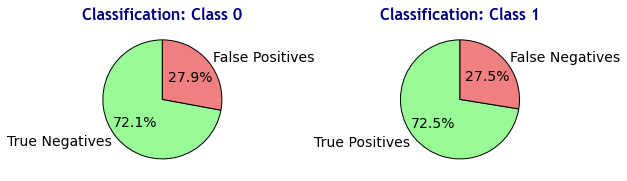

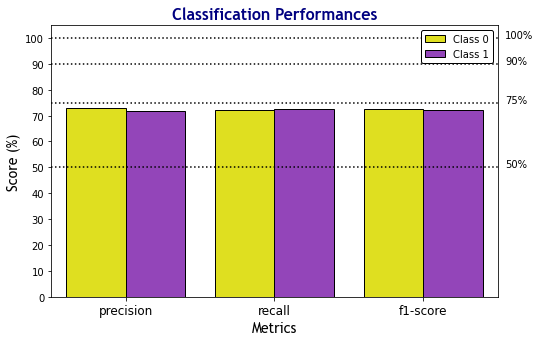

In [97]:
display(HTML(f"""
<div class = 'all'>
    <h1>Support Vector Machine</h1>
    
    <h3>Classification Results</h3>
    {matrix_display(y_test, y_pred)}
</div>
"""))

classification_plot(y_test, y_pred)        
display(HTML(f"""
<div class = 'all'>
    <h3>Metrics</h3>
</div>
"""))

perf_barplot(svm_perf)
report_table(svm_perf)

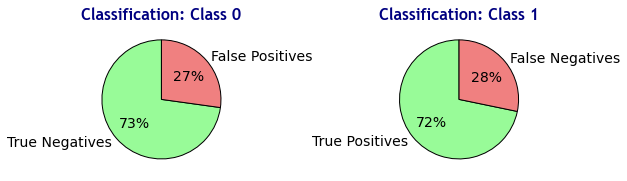

In [69]:
matrix =  pd.crosstab(y_test, y_pred)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 6))

plt.subplots_adjust(wspace = 1)

ax[0].pie(matrix[0], labels = ['True Negatives', 'False Positives'], autopct = '%.0f%%', startangle=90, colors = ['palegreen', 'lightcoral'], wedgeprops = {'edgecolor' : 'black'}, textprops = {'fontsize' : '14'})
ax[0].set_title('Classification: Class 0', fontdict = fontdict_title)
ax[1].pie(matrix[1][::-1], labels = ['True Positives','False Negatives'], autopct = '%.0f%%', startangle=90, colors = ['palegreen', 'lightcoral'], wedgeprops = {'edgecolor' : 'black'}, textprops = {'fontsize' : '14'})
ax[1].set_title('Classification: Class 1', fontdict = fontdict_title)

plt.show()  

,pred,cardio,n,label
0,0.0,0.0,7350,TN
1,0.0,1.0,2745,FN
2,1.0,0.0,2842,FP
3,1.0,1.0,7220,TP


In [59]:
pd.crosstab(y_test, y_pred)

col_0,0.0,1.0
cardio,,
0.0,7350,2842
1.0,2745,7220


In [62]:
y_test.value_counts()[0.0]

10192

In [63]:
7350+2842

10192

In [ ]:
STOP

In [ ]:
# Created Features

# all created features from part I, just drop age_group bc it's redundant

In [ ]:
df1 = pd.read_csv('clean_cvd.csv', sep = ",")            # The very same df that was used on Part I

def preprocess_df1(df = df1):
    # Turning Sex into a binary feature
    df['female_sex'] = df.apply(lambda row: 1 if row['sex'] == 'female' else 0, axis = 1)
    df = df.drop(['sex'], axis = 1)

    # Encoding ordered categorical features
    label_encoder = LabelEncoder()              
    df["cholesterol"] = label_encoder.fit_transform(df["cholesterol"])
    df["gluc"] = label_encoder.fit_transform(df["gluc"])
    df["age_group"] = label_encoder.fit_transform(df["age_group"])
    df["ap_aha"] = label_encoder.fit_transform(df["ap_aha"])

    # Setting datatypes
    df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'female_sex']] = df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'female_sex']].astype('int64')

    # Min-Max Scaling
    scaler = MinMaxScaler()
    df = scaler.fit_transform(df)
    df = pd.DataFrame(df, columns = columns_df)

    # Train and Test datasets
    X = df.drop("cardio", axis = 1)
    y = df['cardio']
    
    return X, y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 46)

In [ ]:
df1 = pd.read_csv('clean_cvd.csv', sep = ",")     
df1['age_group'].value_counts()

In [ ]:
df1 = pd.read_csv('clean_cvd.csv', sep = ",")     
df1.columns.tolist()

In [ ]:
STOP

<h4>Code for: Logistic Regression - Model</h4>

In [ ]:
lr = LogisticRegression(random_state = 41)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

lr_params = lr.get_params()

lr_fi = pd.DataFrame({
    'coef' : lr.coef_[0],
    'var': X.columns.tolist()
})

lr_report = classification_report(y_test, lr_pred, output_dict = True)

<h4>Code for: Logistic Regression - Report</h4>

In [ ]:
display(HTML(f"""
<div class = 'all'>
    <h1>Logistic Regression</h1>
    <p class = 'intro'>
        Logistic Regression is a widely used machine learning model for binary classification tasks. It models 
        the probability that a given input data point belongs to a particular class (in the present case, whether a patient 
        has cardiovascular disease or not). The output of Logistic Regression is a probability score between 0 and 1, 
        which is then thresholded to make a binary prediction.
    </p>
    <h4>Key Points</h4>
    <p style='border-left: 3px solid silver; padding-left: 5px; font-size: 12.5px; margin-left: 15px'>
        <strong>Linear Decision Boundary:</strong> Logistic Regression creates a linear decision boundary to separate the two classes. This decision boundary is a hyperplane in the feature space.
        <br><strong>Probability Output:</strong> Instead of direct class prediction, Logistic Regression outputs probabilities. These probabilities represent the likelihood of the input belonging to the positive class.
        <br><strong>Log-Odds Transformation:</strong> Logistic Regression uses the log-odds (logit) transformation to model the relationship between the input features and the log-odds of the event occurring.
        <br><strong>Sigmoid Activation:</strong> The logistic function (sigmoid) is applied to the linear combination of input features. This function maps any real-valued number to the range [0, 1].
        <br><strong>Maximum Likelihood Estimation:</strong> Logistic Regression estimates parameters using maximum likelihood, aiming to maximize the likelihood of the observed class labels given the input features.
        <br><strong>Regularization:</strong> To prevent overfitting, regularization terms like L1 or L2 regularization can be added to the logistic regression cost function.
    </p>
    <h2>Default Model</h2>
    <h3>Parameters</h3>
    <table class = 'table_1' style = 'width: 100% !important'>
        <tr>
            <th style = 'width: 15%'>Parameter</th>
            <th style = 'width: 5%'>Value</th>
            <th>Definition</th>
            <th>Effect</th>
        </tr>
        <tr>
            <td><b>Inverse of Regularisation Strength</b><br><code>C</code></td>
            <td>{lr_params['C']}</td>
            <td style = 'text-align: justify !important'>The regularisation parameter <code>C</code> is the inverse of the regularisation strength. It controls the trade-off between fitting the training data well and preventing overfitting.</td>
            <td style = 'text-align: justify !important'>Smaller values of <code>C</code> lead to stronger regularisation, encouraging the model to generalize better but possibly underfit. Larger values of C reduce regularisation, allowing the model to fit the training data more closely but risking overfitting.
                <br><br><i>Note: <code>C=0.1</code> indicates strong regularisation, while <code>C=10</code> implies weaker regularisation.</i></td>
        </tr>
        <tr>
            <td><b>Regularisation Type</b><br><code>penalty</code></td>
            <td>{lr_params['penalty']}</td>
            <td style = 'text-align: justify !important'>The penalty parameter determines the type of regularisation applied to the model. It can be either <code>"l1"</code> for L1 regularisation (lasso) or <code>"l2"</code> for L2 regularisation (ridge).</td>
            <td style = 'text-align: justify !important'>L1 regularisation tends to produce sparse coefficients (some coefficients become exactly zero), leading to feature selection. L2 regularisation penalises large coefficients, encouraging smaller but non-zero coefficients for all features.</td>
        </tr>
        <tr>
            <td><b>Maximum Number of Iterations</b><br><code>max_iter</code></td>
            <td>{lr_params['max_iter']}</td>
            <td style = 'text-align: justify !important'>The maximum number of iterations is the maximum number of iterations for the solver to converge (reach a solution).</td>
            <td style = 'text-align: justify !important'>If the solver doesn't converge within the specified number of iterations, it might indicate that the model hasn't found a solution. Increasing the number of iterations may help in such cases.</td>
        </tr>
        <tr>
            <td><b>Optimisation Algorithm</b><br><code>solver</code></td>
            <td>{lr_params['solver']}</td>
            <td style = 'text-align: justify !important'>The solver parameter specifies the optimisation algorithm to use in fitting the logistic regression model.</td>
            <td style = 'text-align: justify !important'>Different solvers have different properties and may perform better or worse depending on the dataset size and characteristics. For example, <code>liblinear</code> is suitable for small datasets, while <code>saga</code> is useful for large datasets with a large number of features.
        </tr>
    </table>
    <h3>Classification Results</h3>
    {matrix_display(pd.crosstab(y_test, lr_pred))}
</div>
"""))
classification_plot(pd.crosstab(y_test, lr_pred))        
display(HTML(f"""
<div class = 'all'>
    <h3>Metrics</h3>
</div>
"""))

perf_barplot(lr_report)
report_table(lr_report)

display(HTML(
f"""
<div class = 'all'>
    <h3>Feature Importance</h3>
</div>
"""
))
lr_fi = lr_fi.sort_values(by='coef', ascending=False)

fig, ax = plt.subplots(figsize = (8,6))

sns.barplot(
    y = 'var', 
    x = 'coef',
    data = lr_fi,
    edgecolor = 'black', 
    ax = ax
)

ax.axvline(x = 1, linestyle = 'dotted', color = 'black')
ax.axvline(x = 2, linestyle = 'dotted', color = 'black')
ax.axvline(x = 9, linestyle = 'dotted', color = 'black')

ax.set_ylabel('Features', fontdict = fontdict_labels)

ax.set_xlim(-1,10)
ax.set_xticks(ticks = range(-1,11,1), labels = range(-1,11,1))
ax.set_xlabel('Feature Coefficient', fontdict = fontdict_labels)

ax.set_title(None)

plt.show()

<h4>Code for: Random Forest - Model</h4>

In [ ]:
rf = RandomForestClassifier(random_state=41)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_params = rf.get_params()

rf_fi = pd.DataFrame({
    'importance': rf.feature_importances_,
    'var': X.columns.tolist()
})

rf_report = classification_report(y_test, rf_pred, output_dict = True)

<h4>Code for: Random Forest - Report</h4>

In [ ]:
display(HTML(f"""
<div class = 'all'>
    <h1>Random Forest</h1>
    <p class = 'intro'>
        The Random Forest algorithm is an ensemble learning technique widely used for both classification and regression 
        tasks. It is an ensemble of decision trees, where multiple decision trees work together to make predictions.
        Random Forest builds multiple decision trees independently and combines their predictions through a voting or averaging mechanism.
    </p>
    <h4>Key Points</h4>
    <p style='border-left: 3px solid silver; padding-left: 5px; font-size: 12.5px; margin-left: 15px'>
        <strong>Bootstrap Sampling:</strong> It starts by creating random subsets of the training data through bootstrap sampling (randomly selecting data points with replacement).
        <br><strong>Feature Randomization:</strong> At each node of each tree, only a random subset of features is considered for splitting. This introduces diversity among the trees.
        <br><strong>Aggregation:</strong> For classification tasks, Random Forest typically uses a majority voting mechanism to make predictions. For regression tasks, it averages the predictions of individual trees.
    </p>
    <h2>Default Model</h2>
    <h3>Parameters</h3>
    <table class = 'table_1' style = 'width: 100% !important'>
        <tr>
            <th style = 'width: 20%'>Parameter</th>
            <th style = 'width: 5%'>Value</th>
            <th>Definition</th>
            <th>Effect</th>
        </tr>
        <tr>
            <td><b>Number of Trees</b><br><code>n_estimators</code></td>
            <td>{rf_params['n_estimators']}</td>
            <td style='text-align: justify !important'>The number of decision trees that will be built during training.</td>
            <td style='text-align: justify !important'>Increasing the number of trees generally improves performance but comes at the cost of increased computation time. A common starting point is around 100 trees.</td>
        </tr>
        <tr>
            <td><b>Maximum Depth of Trees</b><br><code>max_depth</code></td>
            <td>{rf_params['max_depth']}</td>
            <td style='text-align: justify !important'>The maximum number of nodes or levels a decision tree has from the root node to the deepest leaf node.</td>
            <td style='text-align: justify !important'>Controlling the depth helps prevent overfitting. Smaller values of <code>max_depth</code> lead to simpler trees and better generalization.</td>
        </tr>
        <tr>
            <td><b>Minimum Samples to Split</b><br><code>min_samples_split</code></td>
            <td>{rf_params['min_samples_split']}</td>
            <td style='text-align: justify !important'>The minimum number of samples required to split an internal node during the construction of a decision tree.</td>
            <td style='text-align: justify !important'>Higher values of <code>min_samples_split</code> can result in more robust models by preventing the creation of small leaf nodes.</td>
        </tr>
        <tr>
            <td><b>Minimum Samples per Leaf</b><br><code>min_samples_leaf</code></td>
            <td>{rf_params['min_samples_leaf']}</td>
            <td style='text-align: justify !important'>The minimum number of samples required to be at a leaf node. This parameter influences the size of the leaves in the decision trees.</td>
            <td style='text-align: justify !important'>Controlling leaf size helps prevent overfitting. Larger values of <code>min_samples_leaf</code> result in simpler trees.</td>
        </tr>
        <tr>
            <td><b>Maximum Features</b><br><code>max_features</code></td>
            <td>{rf_params['max_features']}</td>
            <td style='text-align: justify !important'>The number of features to consider when looking for the best split in each decision tree.</td>
            <td style='text-align: justify !important'>This parameter controls the randomness of each tree. Using fewer features can lead to decorrelated trees, improving ensemble performance.</td>
        </tr>
    </table>
    <h3>Classification Results</h3>
    {matrix_display(pd.crosstab(y_test, rf_pred))}
</div>
"""))

classification_plot(pd.crosstab(y_test, rf_pred))        
display(HTML(f"""
<div class = 'all'>
    <h3>Metrics</h3>
</div>
"""))

perf_barplot(rf_report)
report_table(rf_report)

display(HTML(
f"""
<div class = 'all'>
    <h3>Feature Importance</h3>
</div>
"""
))
        
rf_fi = rf_fi.sort_values(by = 'importance', ascending = False)

fig, ax = plt.subplots(figsize = (8,6))

sns.barplot(
    y = 'var', 
    x = 'importance',
    data = rf_fi,
    edgecolor = 'black', 
    ax = ax
)

ax.axvline(x = 0.1, linestyle = 'dotted', color = 'black')
ax.axvline(x = 0.2, linestyle = 'dotted', color = 'black')
#ax.axvline(x = 0.3, linestyle = 'dotted', color = 'black')

ax.set_ylabel('Features', fontdict = fontdict_labels)

ax.set_xlim(0,0.3)
ax.set_xticks(ticks = [x/10 for x in range(0,4,1)], labels = [x/10 for x in range(0,4,1)])
ax.set_xlabel('Feature Coefficient', fontdict = fontdict_labels)

ax.set_title(None)

plt.show()

<h4>Code for: Support Vector Machines - Model</h4>

In [ ]:
svm = SVC(random_state = 46)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_params = svm.get_params()
svm_report = classification_report(y_test, svm_pred, output_dict = True)

<h4>Code for: Support Vector Machines - Report</h4>

In [ ]:
display(HTML(f"""
<div class = 'all'>
    <h1>Support Vector Machine</h1>
    <p class = 'intro'>
        The Support Vector Machine is a powerful supervised machine learning algorithm used for classification and 
        regression tasks. It is particularly effective in situations where data may not be linearly separable, 
        making it a versatile choice for various applications. SVM works by finding the hyperplane that maximizes 
        the margin between different classes of data points. It aims to create a decision boundary that effectively 
        separates data points into distinct categories while maximizing the margin between the classes.
    </p>
    <h2>Default Model</h2>
    <h3>Parameters</h3>
    <table class = 'table_1' style = 'width: 100% !important'>
        <tr>
            <th style = 'width: 20%'>Parameter</th>
            <th style = 'width: 5%'>Value</th>
            <th>Definition</th>
            <th>Effect</th>
        </tr>
        <tr>
            <td><b>Regularisation</b><br><code>C</code></td>
            <td>{svm_params['C']}</td>
            <td style='text-align: justify !important'>C controls the trade-off between achieving a low training error and a low testing error.</td>
            <td style='text-align: justify !important'>A small C encourages a larger-margin hyperplane, possibly allowing some training points to be misclassified. A large C penalizes misclassifications more heavily, leading to a smaller-margin hyperplane. Higher values of C may result in a more complex decision boundary, potentially leading to overfitting.</td>
        </tr>
        <tr>
            <td><b>Kernel</b><br><code>kernel</code></td>
            <td>{svm_params['kernel']}</td>
            <td style='text-align: justify !important'>Specifies the type of hyperplane used for separation. Common choices include linear, polynomial, radial basis function (RBF), and sigmoid kernels.</td>
            <td style='text-align: justify !important'>The choice of the kernel determines the shape of the decision boundary. Experimenting with different kernels is essential to find the one that works best for your data.</td>
        </tr>
        <tr>
            <td><b>Gamma</b><br><code>gamma</code></td>
            <td>{svm_params['gamma']}</td>
            <td style='text-align: justify !important'>Parameter for non-linear hyperplanes. It defines how far the influence of a single training example reaches. Low values mean a far reach, and high values mean a limited reach.</td>
            <td style='text-align: justify !important'>Smaller values of gamma lead to a more generalized solution, while larger values make the model more sensitive to the training data (potentially leading to overfitting).</td>
        </tr>
        <tr>
            <td><b>Decision Function Shape</b><br><code>decision_function_shape</code></td>
            <td>{svm_params['decision_function_shape']}</td>
            <td style='text-align: justify !important'>determines whether to use a one-vs-one (<code>'ovo'</code>) or one-vs-the-rest (<code>'ovr'</code>) strategy for multi-class classification.</td>
            <td style='text-align: justify !important'>The choice of strategy can affect the computational efficiency and performance, especially in the case of a large number of classes.</td>
        </tr>
    </table>
    <h3>Classification Results</h3>
    {matrix_display(pd.crosstab(y_test, svm_pred))}
</div>
"""))

classification_plot(pd.crosstab(y_test, svm_pred))        
display(HTML(f"""
<div class = 'all'>
    <h3>Metrics</h3>
</div>
"""))

perf_barplot(svm_report)
report_table(svm_report)

<h4>Code for: K-Nearest Neighbors - Model</h4>

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_params = knn.get_params()
knn_report = classification_report(y_test, knn_pred, output_dict = True)

<h4>Code for: K-Nearest Neighbors - Report</h4>

In [ ]:
display(HTML(f"""
<div class = 'all'>
    <h1>K-Nearest Neighbors</h1>
    <p class = 'intro'>
        The k-Nearest Neighbors algorithm is a versatile supervised machine learning approach commonly used for 
        classification and regression tasks. It stands out for its simplicity and effectiveness, making it applicable 
        across various domains. KNN operates by identifying the k-nearest data points to a given test point and making 
        predictions based on the majority class (for classification) or average (for regression) of those neighbors. 
        It doesn't assume a specific underlying functional form and can adapt to different data distributions.
    </p>
    <h2>Default Model</h2>
    <h3>Parameters</h3>
    <table class = 'table_1' style = 'width: 100% !important'>
        <tr>
            <th style = 'width: 15%'>Parameter</th>
            <th style = 'width: 10%'>Value</th>
            <th>Definition</th>
            <th>Effect</th>
        </tr>
        <tr>
            <td><b>Neighbors</b><br><code>n_neighbors</code></td>
            <td>{knn_params['n_neighbors']}</td>
            <td style='text-align: justify !important'>The number of neighbors to consider when making predictions.</td>
            <td style='text-align: justify !important'>Smaller values make the model more sensitive to noise in the data, potentially leading to overfitting. Larger values provide a smoother decision boundary but may lead to underfitting.</td>
        </tr>
        <tr>
            <td><b>Weights</b><br><code>weights</code></td>
            <td>{knn_params['weights']}</td>
            <td style='text-align: justify !important'>weight given to each neighbor when making predictions. Options include 'uniform' (all neighbors have equal weight) and 'distance' (closer neighbors have more influence).</td>
            <td style='text-align: justify !important'>Choosing 'distance' may be useful when you expect nearer neighbors to have a greater impact on the prediction.</td>
        </tr>
        <tr>
            <td><b>Algorithm</b><br><code>algorithm</code></td>
            <td>{knn_params['algorithm']}</td>
            <td style='text-align: justify !important'>Specifies the algorithm used to compute the nearest neighbors. Options include 'auto', 'ball_tree', 'kd_tree', and 'brute'. The 'auto' option selects the most appropriate algorithm based on the values passed to fit.</td>
            <td style='text-align: justify !important'>Different algorithms may have different performance characteristics based on the dataset size and dimensionality.</td>
        </tr>
        <tr>
            <td><b>Power Parameter</b><br><code>p</code></td>
            <td>{knn_params['p']}</td>
            <td style='text-align: justify !important'>The power parameter for the Minkowski distance metric.</td>
            <td style='text-align: justify !important'>When <code>p</code> is set to 1, it is equivalent to using the Manhattan distance (L1 norm). When <code>p</code> is set to 2, it is equivalent to using the Euclidean distance (L2 norm). he choice of distance metric influences how distances are calculated and can affect the model's sensitivity to different features.</td>
        </tr>
        <tr>
            <td><b>Leaf Size</b><br><code>leaf_size</code></td>
            <td>{knn_params['leaf_size']}</td>
            <td style='text-align: justify !important'>The number of points at which the algorithm switches to brute-force search. It influences the trade-off between the time complexity of the search and the space complexity of the data structure.</td>
            <td style='text-align: justify !important'>Smaller values may lead to faster queries but require more memory. Larger values reduce memory requirements but may increase query time.</td>
        </tr>
    </table>
    <h3>Classification Results</h3>
    {matrix_display(pd.crosstab(y_test, knn_pred))}
</div>
"""))

classification_plot(pd.crosstab(y_test, knn_pred))        
display(HTML(f"""
<div class = 'all'>
    <h3>Metrics</h3>
</div>
"""))

perf_barplot(knn_report)
report_table(knn_report)

<h4>Code for: AdaBoost - Model</h4>

In [ ]:
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)
adb_pred = adb.predict(X_test)

adb_params = adb.get_params()

adb_report = classification_report(y_test, adb_pred, output_dict = True)

<h4>Code for: AdaBoost - Report</h4>

In [ ]:
display(HTML(f"""
<div class = 'all'>
    <h1>AdaBoost</h1>
    <p class = 'intro'>
        AdaBoost, short for Adaptive Boosting, is a popular ensemble learning technique used for classification and 
        regression tasks. It is designed to improve the accuracy of weak learners (classifiers) by combining their 
        predictions into a strong ensemble model. AdaBoost works by sequentially training multiple weak classifiers on 
        the dataset. Each weak classifier focuses on the data points that were misclassified by the previous ones. 
        The algorithm assigns more weight to misclassified data points, allowing subsequent classifiers to pay more 
        attention to them. The final prediction is a weighted combination of the weak classifiers.
    </p>
    <h4>Key Points</h4>
    <p style = 'border-left: 3px solid silver; padding-left: 5px; font-size : 12.5px; margin-left: 15px'>
        <strong>Sequential Learning:</strong> Weak learners are trained sequentially, and their performance guides subsequent iterations.
        <br><strong>Weighted Data:</strong> AdaBoost assigns different weights to data points, emphasizing the importance of misclassified samples.
        <br><strong>Weighted Voting:</strong> The final prediction is a weighted vote of all weak classifiers, with more accurate classifiers having a greater influence.
    </p>
    <h2>Default Model</h2>
    <h3>Parameters</h3>
    <table class = 'table_1' style = 'width: 100% !important'>
        <tr>
            <th style = 'width: 15%'>Parameter</th>
            <th style = 'width: 10%'>Value</th>
            <th>Definition</th>
            <th>Effect</th>
        </tr>
        <tr>
            <td><b>Weak Learners</b><br><code>n_estimators</code></td>
            <td>{adb_params['n_estimators']}</td>
            <td style='text-align: justify !important'>The number of weak learners (e.g., decision trees) to be combined in the ensemble. </td>
            <td style='text-align: justify !important'>Increasing the number of estimators may improve performance up to a certain point but could lead to overfitting if set too high. There's also a trade-off between computational cost and gains in accuracy.</td>
        </tr>
        <tr>
            <td><b>Learning Rate</b><br><code>learning_rate</code></td>
            <td>{adb_params['learning_rate']}</td>
            <td style='text-align: justify !important'>The contribution of each weak learner.</td>
            <td style='text-align: justify !important'>Smaller values may improve generalization but require a higher number of estimators.</td>
        </tr>
        <tr>
            <td><b>Base Estimator</b><br><code>base_estimator</code></td>
            <td>{adb_params['base_estimator']}</td>
            <td style='text-align: justify !important'>The weak learner used as the base model. If set to None, a decision tree with a depth of 1 <code>(DecisionTreeClassifier(max_depth=1))</code> is used by default.</td>
            <td style='text-align: justify !important'>The choice of the base estimator influences the flexibility of the ensemble. A shallow tree is often used to prevent overfitting.</td>
        </tr>
        <tr>
            <td><b>Algorithm</b><br><code>algorithm</code></td>
            <td>{adb_params['algorithm']}</td>
            <td style='text-align: justify !important'>The boosting algorithm to use. <code>'SAMME'</code> (Stagewise Additive Modeling using a Multiclass Exponential loss function) or <code>'SAMME.R'</code> (Real). <code>'SAMME.R'</code> is recommended for better performance.</td>
            <td style='text-align: justify !important'><code>'SAMME.R'</code> often converges faster and provides better accuracy compared to <code>'SAMME'</code>, especially when weak learners can assign class probabilities.</td>
        </tr>
    </table>
    <h3>Classification Results</h3>
    {matrix_display(pd.crosstab(y_test, adb_pred))}
</div>
"""))

classification_plot(pd.crosstab(y_test, adb_pred))        
display(HTML(f"""
<div class = 'all'>
    <h3>Metrics</h3>
</div>
"""))

perf_barplot(adb_report)
report_table(adb_report)

adb_fi = pd.DataFrame({'var': X.columns, 'importance' : adb.feature_importances_})

adb_fi = adb_fi.sort_values(by = 'importance', ascending = False)

fig, ax = plt.subplots(figsize = (8,6))

sns.barplot(
    y = 'var', 
    x = 'importance',
    data = adb_fi,
    edgecolor = 'black', 
    ax = ax
)

ax.axvline(x = 0.1, linestyle = 'dotted', color = 'black')
ax.axvline(x = 0.2, linestyle = 'dotted', color = 'black')
ax.axvline(x = 0.3, linestyle = 'dotted', color = 'black')

ax.set_ylabel('Features', fontdict = fontdict_labels)

ax.set_xlim(0,0.4)
ax.set_xticks(ticks = [x/10 for x in range(0,5,1)], labels = [x/10 for x in range(0,5,1)])
ax.set_xlabel('Feature Coefficient', fontdict = fontdict_labels)

ax.set_title(None)


plt.show()

<h4>Code for: ?</h4>

In [ ]:
scores_ml = pd.DataFrame()
reports = lr_report, rf_report, svm_report, knn_report, adb_report
names = ["lr_", "rf_", "svm_", "knn_", "adb_"]
classification = ['0.0', '1.0']

for report, name in zip(reports, names):    
    for i in ['0.0', '1.0']:
        report[i]['accuracy'] = report['accuracy']
        report[i]['class'] = i[0]
        name_index = name + i[0]
        scores_ml = pd.concat([scores_ml, pd.DataFrame(report[i], index = [name_index])])

scores_ml = scores_ml.reset_index().rename(columns = {'index' : 'model'}).drop(['support'], axis = 1)

labels_ml = pd.DataFrame()
preds = [lr_pred, rf_pred, svm_pred, knn_pred, adb_pred]
full_names = ['Logistic Regression', 'Random Forest', 'SVM', 'K-Nearest Neighbors', 'AdaBoost']


for pred, name, report, full_name in zip(preds, names, reports, full_names):
    name_index = name[:-1]
    recap = pd.DataFrame({
            'TN': pd.crosstab(y_test, pred, normalize='index').iloc[0, 0],
            'FP': pd.crosstab(y_test, pred, normalize='index').iloc[0, 1],
            'FN': pd.crosstab(y_test, pred, normalize='index').iloc[1, 0],
            'TP': pd.crosstab(y_test, pred, normalize='index').iloc[1, 1],
            'accuracy': report['accuracy'],
            'full_name': full_name
        }, index=[name_index])
    labels_ml = pd.concat([labels_ml, recap])
    

labels_ml = labels_ml.reset_index().rename(columns = {'index' : 'model'})


scores_ml
labels_ml

In [ ]:
display(HTML(f"""
<div class = 'all'>
    <h1>Synthesis</h1>
    <p class = 'intro'>
        Now that all models have been trained and tested, with their performances recorded, we may select the model that 
        feels the most suitable for this classification project.
    </p>
    <h4>Reminder: Metrics Signification</h4>
    <p style='border-left: 3px solid silver; padding-left: 5px; font-size: 12.5px; margin-left: 15px'>
        <strong>Accuracy:</strong> Measures the overall correctness of the model by calculating the ratio of correctly predicted instances to the total instances. It provides a general assessment of model performance.
        <br><strong>Precision:</strong> Indicates the accuracy of positive predictions. It is the ratio of correctly predicted positive observations to the total predicted positives. Precision is relevant when the cost of false positives is high.
        <br><strong>Recall:</strong> Measures the ability of the model to capture all the relevant instances, specifically the ratio of correctly predicted positive observations to the total actual positives. Recall is important when the cost of false negatives is high.
        <br><strong>F1 Score:</strong> Combines precision and recall into a single metric, providing a balance between the two. It is the harmonic mean of precision and recall, offering a comprehensive evaluation of the model's performance.
    </p>
    <h3>Correct Predictions</h3>
    

</div>
"""))
head = f"""
    <table class = 'table_1'>
        <tr>
            <th style = 'border-right: 1px solid black; width: 20%'>Model</th>
            <th style = 'border-right: 1px solid black'>Class 0 - <i>Absence of CV Disease</i></th>
            <th> Class 1 - <i>Presence of CV Disease</i></th>
            <th style = 'border-left: 1px solid black'>Accuracy</th>
        </tr>
"""
body = f""""""

for key, value in {'Logistic Regression' : 'lr', 'Random Forest' : 'rf', 'Support Vector Machines': 'svm', 'K-Nearest Neighbors': 'knn', 'AdaBoost': 'adb'}.items():
        body += f"""
            <tr>
                <td style = 'text-align: right !important'><b>{key}</b></td>"""
        
        for label in ['TN', 'TP', 'accuracy']:
            val = labels_ml[labels_ml['model'] == value][label].values[0]
            if val == np.max(labels_ml[label]):
                body += f"""<td style = 'color: forestgreen; font-weight: bold'>{val:.1%}</td>"""
            
            elif val == np.min(labels_ml[label]):
                    body += f"""<td style = 'color: firebrick; font-weight: bold'>{val:.1%}</td>"""
                    
            else:
                body += f"""<td>{val:.1%}</td>"""
        body += f"""</tr>"""
             
tail = f"""
    </table>
"""

display(HTML(f"""
<div class = 'all'>
    {head+body+tail}
    <h3>Performances</h3>
</div>
"""))

# Score df for class 0
scores_0 = scores_ml[scores_ml['class'] == "0"].drop('class', axis = 1)
scores_0['model'] = scores_0['model'].apply(lambda x: x[:-2])

# Score df for class 1
scores_1 = scores_ml[scores_ml['class'] == "1"].drop('class', axis = 1)
scores_1['model'] = scores_1['model'].apply(lambda x: x[:-2])

# scores_0_melt = pd.melt(scores_ml[scores_ml['class'] == "0"].drop(['class', 'accuracy'], axis = 1), id_vars = ['model'], var_name = ['metric'], value_name = 'score')
# scores_0_melt["model"] = scores_0["model"].apply(lambda row: row[:-2])


fig = plt.figure(figsize = (15,10))
spec = gridspec.GridSpec(nrows = 2, ncols = 3)

x_ticks_models = {
    'lr': 'Logistic\nRegression',
    'rf' : 'Random\nForest',
    'svm': 'SVM',
    'knn': 'K-Nearest\nNeighbors',
    'adb': 'AdaBoost'
}

palette_models = {
    'lr': 'skyblue',
    'rf' : 'lawngreen',
    'svm': 'yellow',
    'knn': 'sandybrown',
    'adb': 'pink'
}


i = 0
for df in [scores_0, scores_1]:
    for param, param_spec in {"precision": spec[i,0], "recall": spec[i,1], "f1-score": spec[i,2]}.items():
        ax = fig.add_subplot(param_spec)

        sns.barplot(
            y = param, 
            x = "model", 
            data = df.sort_values(by = param, ascending = False), 
            edgecolor = 'black', 
            ax = ax, 
            palette= palette_models
        )

        ax.set_ylim(0,1)
        ax.set_yticks(ticks = [x/10 for x in range(0,11,1)], labels = range(0,110,10))
        if param_spec == spec[0,0]:
            ax.set_ylabel('Value for Class 0 (%)', fontdict = fontdict_labels)
        elif param_spec == spec[1,0]:
            ax.set_ylabel('Value for Class 1 (%)', fontdict = fontdict_labels)
        else:
            ax.set_ylabel(None)

        ax.set_xticklabels(x_ticks_models[label.get_text()] for label in ax.get_xticklabels())
        ax.set_xlabel(None)
        
        if df.equals(scores_0):
            ax.set_title(param.capitalize(), fontdict = fontdict_title)
        else:
            ax.set_title(None)
        
        # Setting the % value on top of each bar, the first bar in bold.
        first_bar = 0    
        for container in ax.containers:
            for bar in container.patches:
                x_bar = bar.get_x()
                y_bar = bar.get_height()
                if first_bar == 0:
                    ax.text(x_bar, y_bar+0.03, f"{y_bar:.1%}", size = 12, fontweight = 'bold')
                else:
                    ax.text(x_bar, y_bar+0.03, f"{y_bar:.1%}", size = 12)
                first_bar += 1
                             
    i += 1



plt.show()

display(HTML(f"""
<div class = 'all'>
    <h3>Analysis</h3>
    <p>
        For this project, we tested five of the commonly machine learning models used for classification
        tasks, namely <b>Logistic Regression</b>, <b>Random Forest</b>, <b>Support Vector Machines</b>, 
        <b>K-Nearest Neighbors</b> and <b>AdaBoost</b>.
        These models were trained on the same dataset ({X_train.shape[0]} rows and {X_train.shape[1]} columns) and their
        performances were recorded. 
        Overall, all models presented comparable performances, with accuracies ranging from 
        <b>{np.min(labels_ml['accuracy']):.1%}</b> for 
        <b>{labels_ml.loc[labels_ml['accuracy'].idxmin(), 'full_name']}</b>
        to <b>{np.max(labels_ml['accuracy']):.1%}</b> for 
        <b>{labels_ml.loc[labels_ml['accuracy'].idxmax(), 'full_name']}</b>
    </p>
    <p>
        Regarding <b>Class 0</b>, <i>ie</i> absence of cardiovascular disease, 
        <b>{labels_ml.loc[labels_ml['TN'].idxmax(), "full_name"]}</b> was the best model, with 
        <b>{np.max(labels_ml['TN']):.1%}</b> of correct classifications. <b>Logistic Regression</b> and <b>SVM</b>
        also performed well, with {labels_ml[labels_ml['model'] == 'lr']['TN'].values[0]:.1%} and 
        {labels_ml[labels_ml['model'] == 'svm']['TN'].values[0]:.1%} of correct classifications, respectively. Conversely,
        <b>Random Forest</b> and <b>KNN</b> achieved only <b>{labels_ml[labels_ml['model'] == 'rf']['TN'].values[0]:.1%}</b>
        and <b>{labels_ml[labels_ml['model'] == 'knn']['TN'].values[0]:.1%}</b> of correct classification, respectively.
    </p>
    <p>
        <b>{labels_ml.loc[labels_ml['TP'].idxmax(), 'full_name']}</b> however reached the highest rate
        (<b>{labels_ml.loc[labels_ml['TP'].idxmax(), 'TP']:.1%}</b>) of correct classifications for <b>Class 1</b>
        (<i>ie</i> presence of Cardiovascular disease). 
        <b>KNN</b> ({labels_ml.loc[labels_ml['model'] == 'knn', 'TP'].values[0]:.1%}),
        <b>SVM</b> ({labels_ml.loc[labels_ml['model'] == 'svm', 'TP'].values[0]:.1%}) and
        <b>Logistic Regression</b> ({labels_ml.loc[labels_ml['model'] == 'lr', 'TP'].values[0]:.1%}) had comparable results,
        while <b>AdaBoost</b> provided only <b>{labels_ml.loc[labels_ml['TP'].idxmin(), 'TP']:.1%}</b> of correct classifications.
    </p>
    <p>
        All things considered, Support Vector Machines will be selected for this project, as it presents the best accuracy
        (<b>{labels_ml.loc[labels_ml['accuracy'].idxmax(), 'accuracy']:.1%}</b>), a good rate of correct predictions
        for Class 0 (<b>{labels_ml[labels_ml['model'] == 'svm']['TN'].values[0]:.1%}</b>) and an acceptable rate for Class 1
        (<b>{labels_ml[labels_ml['model'] == 'svm']['TP'].values[0]:.1%}</b>).
    </p>
    <p>
        It should be kept in mind that Random Forest would have make a relevant choice as well, with the highest rate
        of correct classification for class 1 (<b>{labels_ml.loc[labels_ml['TP'].idxmax(), 'TP']:.1%}</b>) despite a lower
        accuracy (<b>{labels_ml[labels_ml['model'] == 'rf']['accuracy'].values[0]:.1%}</b>). In the present context, 
        we want to limit the number of wrong predictions for class 1. Indeed, should an individual be incorrectly labeled as "patient", further diagnostic
        testing would soon reveal that this individual do not have CV disease. On the other hand, misclassifiying a patient as
        not having CV disease may take them out of medical care for a wild and have consequences.
    </p>
</div>
"""))

<h4>Code for: SVM - Parameters Exploration</h4>

In [ ]:
default_scale_gamma = 0.691955007227351

In [ ]:
svm_1 = SVC()
svm_1.fit(X_train, y_train)
svm_pred_1 = svm_1.predict(X_test)

svm_params_1 = svm_1.get_params()
svm_report_1 = classification_report(pd.crosstab(y_test, svm_pred_1))

In [ ]:
xgb = XGBClassifier()

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgb_params = xgb.get_params()

xgb_report = classification_report(y_test, y_pred, output_dict = True)

In [ ]:
display(HTML(f"""
<div class = 'all'>
    <h1>XGBoost</h1>
    <p class = 'intro'>
        XGBoost, short for Extreme Gradient Boosting, is a powerful and efficient machine learning algorithm known 
        for its exceptional performance in various data science competitions and real-world applications. 
        It is an ensemble learning method based on decision trees and gradient boosting. XGBoost builds an ensemble of 
        decision trees sequentially, with each tree aiming to correct the errors of the previous ones. 
        It combines their predictions to make a final prediction. XGBoost introduces several innovations to 
        improve accuracy and efficiency:</p>
    <h4>Key Points</h4>
    <p style = 'border-left: 3px solid silver; padding-left: 5px; font-size : 12.5px; margin-left: 15px'>
        <strong>Gradient Boosting:</strong> XGBoost uses gradient boosting, which minimizes the loss function by iteratively adding new trees. It pays more attention to the samples that are difficult to predict.
        <br><strong>Regularization:</strong> XGBoost incorporates L1 and L2 regularization terms into the objective function to prevent overfitting.
        <br><strong>Handling Missing Data:</strong> XGBoost can naturally handle missing data, making it suitable for datasets with incomplete information.
        <br><strong>Parallel Processing:</strong> It efficiently utilizes parallel processing, speeding up training times.
    </p>
    <h2>Default Model</h2>
    <h3>Parameters</h3>
    <table class='table_1' style='width: 100% !important'>
        <tr>
            <th style='width: 15%'>Parameter</th>
            <th style='width: 10%'>Value</th>
            <th>Definition</th>
            <th>Effect</th>
        </tr>
        <tr>
            <td><b>Number of Estimators</b><br><code>n_estimators</code></td>
            <td>{xgb_params['n_estimators']}</td>
            <td style='text-align: justify !important'>The number of boosting rounds or weak learners (trees) to be combined in the ensemble.</td>
            <td style='text-align: justify !important'>Increasing the number of estimators may improve performance up to a certain point but could lead to overfitting if set too high. There's also a trade-off between computational cost and gains in accuracy.</td>
        </tr>
        <tr>
            <td><b>Learning Rate</b><br><code>learning_rate</code></td>
            <td>{xgb_params['learning_rate']}</td>
            <td style='text-align: justify !important'>The step size shrinkage used in update to prevent overfitting.</td>
            <td style='text-align: justify !important'>Smaller values may improve generalization but require a higher number of estimators. It controls the contribution of each tree to the final prediction.</td>
        </tr>
        <tr>
            <td><b>Booster Type</b><br><code>booster</code></td>
            <td>{xgb_params['booster']}</td>
            <td style='text-align: justify !important'>The type of boosting model to be used. Common values are 'gbtree' (tree-based models), 'gblinear' (linear models), and 'dart' (Dropouts meet Multiple Additive Regression Trees).</td>
            <td style='text-align: justify !important'>The booster type influences the learning process and the structure of weak learners. 'gbtree' is commonly used for its effectiveness.</td>
        </tr>
        <tr>
            <td><b>Column Subsampling</b><br><code>colsample_bytree</code></td>
            <td>{xgb_params['colsample_bytree']}</td>
            <td style='text-align: justify !important'>Fraction of features to be randomly sampled for each tree.</td>
            <td style='text-align: justify !important'>Controlling the fraction of features used helps prevent overfitting by introducing diversity among the trees.</td>
        </tr>
        <tr>
            <td><b>Maximum Tree Depth</b><br><code>max_depth</code></td>
            <td>{xgb_params['max_depth']}</td>
            <td style='text-align: justify !important'>The maximum depth of each tree in the ensemble.</td>
            <td style='text-align: justify !important'>A deeper tree can capture more complex patterns but may lead to overfitting. It's a crucial parameter to control the complexity of the model.</td>
        </tr>
    </table>
    <h3>Classification Results</h3>
    {matrix_display(pd.crosstab(y_test, y_pred))}
</div>
"""))

classification_plot(pd.crosstab(y_test, y_pred))        
display(HTML(f"""
<div class = 'all'>
    <h3>Metrics</h3>
</div>
"""))

perf_barplot(xgb_report)
report_table(xgb_report)

xgb_fi = pd.DataFrame({'var': X.columns, 'importance' : xgb.feature_importances_})

xgb_fi = xgb_fi.sort_values(by = 'importance', ascending = False)

fig, ax = plt.subplots(figsize = (8,6))

sns.barplot(
    y = 'var', 
    x = 'importance',
    data = xgb_fi,
    edgecolor = 'black', 
    ax = ax
)

ax.axvline(x = 0.1, linestyle = 'dotted', color = 'black')
ax.axvline(x = 0.2, linestyle = 'dotted', color = 'black')
ax.axvline(x = 0.5, linestyle = 'dotted', color = 'black')

ax.set_ylabel('Features', fontdict = fontdict_labels)

ax.set_xlim(0,0.6)
ax.set_xticks(ticks = [x/10 for x in range(0,7,1)], labels = [x/10 for x in range(0,7,1)])
ax.set_xlabel('Feature Coefficient', fontdict = fontdict_labels)

ax.set_title(None)

plt.show()

In [ ]:
xgb_params


<div class = 'all'>
<h2>Overview of Decision Trees:</h2>
<p>A Decision Tree is a supervised machine learning algorithm that can be used for both classification and regression tasks. In the context of your project, where the target variable is "cardio" (indicating the presence or absence of cardiovascular disease), we will focus on classification Decision Trees.</p>

<h3>How Decision Trees Work:</h3>
<p>A Decision Tree divides the dataset into subsets based on the values of input features, creating a tree-like structure of decisions. Each internal node of the tree represents a feature, each branch represents a decision based on that feature, and each leaf node represents a class label (in your case, "cardio" class) or a regression value.</p>

<p>The process of building a Decision Tree involves selecting the best feature at each step to split the data, based on criteria such as Gini impurity or information gain. The tree continues to split until a stopping criterion is met, such as a maximum tree depth or a minimum number of samples per leaf.</p>

<h2>Pros of Using Decision Trees for Your Project:</h2>
<ul>
    <li><strong>Interpretability:</strong> Decision Trees are easy to understand and interpret, making them suitable for explaining the model's decisions to non-technical stakeholders, such as healthcare professionals.</li>
    <li><strong>Feature Importance:</strong> Decision Trees can provide information about feature importance, helping you identify which health-related factors contribute the most to cardiovascular disease prediction.</li>
    <li><strong>Non-Linear Relationships:</strong> Decision Trees can capture non-linear relationships between input features and the target variable, which may be important in medical diagnosis.</li>
    <li><strong>Handling Missing Values:</strong> Decision Trees can handle missing data without requiring extensive preprocessing, which is beneficial if your dataset contains incomplete information.</li>
</ul>

<h2>Cons of Using Decision Trees for Your Project:</h2>
<ul>
    <li><strong>Overfitting:</strong> Decision Trees are prone to overfitting, especially when the tree becomes too deep or complex. Overfitting may lead to poor generalization to unseen data.</li>
    <li><strong>Instability:</strong> Small variations in the data can result in significantly different trees, making Decision Trees less stable compared to some other algorithms.</li>
    <li><strong>Not Ideal for Highly Imbalanced Data:</strong> If your dataset has a severe class imbalance (e.g., many more instances of one class than the other), Decision Trees may produce biased results.</li>
    <li><strong>Difficulty with Complex Relationships:</strong> Decision Trees may struggle to model complex relationships that involve multiple interacting features.</li>
</ul>

<h2>Conclusion:</h2>
<p>Decision Trees offer a transparent and interpretable approach to classification tasks like cardiovascular disease prediction. They can provide valuable insights into feature importance and non-linear relationships in your data. However, to mitigate overfitting and instability, you may need to apply techniques like pruning or ensemble methods, such as Random Forests or Gradient Boosting, which can enhance the performance of Decision Trees while maintaining their interpretability.</p>
</div>

In [ ]:
# Prepration of 2 dfs
df = pd.read_csv('clean_cvd.csv', sep = ",")            # The very same df that was used on Part I
df1 = pd.read_csv('clean_cvd.csv', sep = ",")            # Modified df taking Part I's suggestions into account

def df_set_dtypes(df):
    df[['smoke', 'alco', 'active', 'cardio', 'cholesterol', 'gluc','ap_aha', 'lifestyle', 'healthy_ls']] = df[['smoke', 'alco', 'active', 'cardio', 'cholesterol', 'gluc','ap_aha', 'lifestyle', 'healthy_ls']].astype('str') 
    df[['sex', 'smoke', 'alco', 'active', 'cardio', 'lifestyle', 'healthy_ls']] = df[['sex', 'smoke', 'alco', 'active', 'cardio', 'lifestyle', 'healthy_ls']].astype('category')
    cat_gluc_chol = pd.CategoricalDtype(categories = ["1", "2", "3"], ordered = True)
    df[['cholesterol', 'gluc']] = df[['cholesterol', 'gluc']].astype(cat_gluc_chol)
    cat_aha = pd.CategoricalDtype(categories = ["1", "2", "3", "4"], ordered = True)
    df['ap_aha'] = df['ap_aha'].astype(cat_aha)
    cat_lifestyle = pd.CategoricalDtype(categories = ["0", "1", "2", "3", "4", "5", "6", "7"], ordered = False)
    df['lifestyle'] = df['lifestyle'].astype(cat_lifestyle)
    return df

df_raw = df_set_dtypes(df_raw)
df = df_set_dtypes(df)
df1 = df_set_dtypes(df1)

df1 = df1.drop(['height', 'gluc', 'smoke'], axis = 1)  # REFLEXIONNER SUR BLOUDE PRECHEURE 

############################################################################################################

w_max = np.percentile(df['weight'], 97.5)
w_min = np.percentile(df['weight'], 2.5)

df1 = df1[(df1['weight'] <= w_max) & (df1['weight'] >= w_min)]     # Dropping values outside of weight's 95% CI

df1_m = df1[df1['sex'] == "male"]
df1_f = df1[df1['sex'] == "female"]

frac = len(df1_m)/len(df1_f)

df1_f = df1_f.sample(frac = frac, random_state = 41)

df1 = pd.concat([df1_m, df1_f])

def preprocessing_df(df, gluc = "no"):
    
    # Getting dummies for unordered categorical features
    df = pd.get_dummies(df, columns = ['sex'])
    df = df.drop(['age_group', 'lifestyle', 'ap_m', 'ap_aha'], axis = 1)
    
    # Encoding ordered categorical features
    label_encoder = LabelEncoder()              
    df["cholesterol"] = label_encoder.fit_transform(df["cholesterol"])
    #df["ap_aha"] = label_encoder.fit_transform(df["ap_aha"])
    
    if gluc == "yes":
        df["gluc"] = label_encoder.fit_transform(df["gluc"])

    # Min-Max Scaling
    scaler = MinMaxScaler()
    columns_df = df.columns          # Saving columns names before scaling
    df = scaler.fit_transform(df)
    df = pd.DataFrame(df, columns = columns_df)

    # Train and Test datasets
    X = df.drop("cardio", axis = 1)
    y = df['cardio']
     
    return X, y

X, y = preprocessing_df(df, gluc = "yes")

#X1, y1 = preprocessing_df(df1)

display(HTML(f"""
<div class = 'all'>
    <h1>Preprocessing</h1>
    
    <p class = 'intro'>
        Following data processing and data viz realisation in Part I, the dataset now contains {df.shape[0]} rows
        and {df.shape[1]} columns. This section will cover the preprocessing needed to have dataset fit for machine learning : categorical encoding, normalisation and train/test splitting.
    </p>
    <h2>Datasets</h2>
    <p>
        Two datasets were considered for machine learning. Dataset named <code>df0</code> is the dataset used in Part I,
        containing all columns previously described. A second dataset, <code>df1</code>, was design according to Part I's
        conclusions, therefore:
        <ul>
            <li><code>height</code>, <code>gluc</code> and <code>smoke</code> were dropped</li>
            <li>extreme values for <code>weight</code> were dropped (<i>ie</i>: values outside of the 95% CI)</li>
            <li>Entries from female subjects were randomly dropped so <code>sex</code> could be balanced</li>
        </ul>
        Consequently, this second dataset comprised <b>{df1.shape[0]} rows</b> and <b>{df1.shape[1]} columns</b>. 
        BMI ranged from <b>{np.min(df1['bmi']):.1f}</b> to <b>{np.max(df1['bmi']):.1f}</b> kg/m² (compared to
        {np.min(df['bmi']):.1f} to {np.max(df['bmi']):.1f} kg/m² in <code>df0</code>) and the proportion of patients
        among females was not impacted by sex-balancing; 
        <b>{df1[df1['sex'] == 'female']['cardio'].value_counts(normalize=True)["1"]:.1%}</b> in 
        <code>df1</code> <i>vs</i> {df[df['sex'] == 'female']['cardio'].value_counts(normalize=True)["1"]:.1%} 
        in <code>df0</code>.
    </p>
    <p>
        Modelling will be performed on <code>df0</code> and <code>df1</code> only, to avoid training too many models.
        Extra datasets shall be trained of the most performant model:
        <ul>
            <li>Separate models for males and females</li>
            <li>Models based on age</li>
            <li>If relevant: models dedicated to a specific age range for both sex</li>
        </ul>
    </p>
    <h2>Preprocessing Operations</h2>
    <h3>Feature Encoding</h3>
    <p>
        Unordered categorical features, ie <code>sex</code>, <code>age_group</code>, and <code>lifestyle</code> were
        encoded using <code>pd.get_dummies()</code>.
        Ordered categorical features, <i>ie</i> <code>cholesterol</code>, <code>gluc</code> and <code>ap_aha</code>, 
        were encoded using <code>LabelEncoder()</code>, as their modalities were originally passed as strings.
    </p>
    <h3>Normalisation</h3>
    <p>
        Among preprocessing techniques, normalisation aims at scaling data features to a specific range, 
        often between 0 and 1. It felt appropriate since the scale of the features of this dataset varies significantly, 
        with majority of features having a non-gaussian distribution. 
        Normalisation helps bring all features to a common scale, making them directly comparable.
    </p>
    <h3>Train and Test Datasets</h3>
</div>"""))

In [ ]:
display(HTML(f"""
<div class = 'all'>
    <h1>Logistic Regression:</h1>
    <p class = 'intro'>A Decision Tree is a supervised machine learning algorithm that can be used for 
    both classification and regression tasks. In the context of your project, where the target variable is "cardio" 
    (indicating the presence or absence of cardiovascular disease), we will focus on classification Decision Trees..
    </p>
    <h2>Pros and Cons:</h2>
    <h3>Pros</h3>
    <ul>
        <li><b>Interpretability:</b> Logistic Regression provides interpretable results. The impact of each feature 
        on the predicted probability is made easy to understand: it produces coefficients for each feature,
        allowing the identification of which features are significant.</li>
        <li><b>Efficiency:</b> Logistic Regression is computationally efficient and can handle large datasets with 
        relatively low computational resources. It trains quickly and can be a good baseline model.</li>
        <li><b>Well-suited for Linear Relationships:</b> When the relationship between features and the target variable 
        is approximately linear, Logistic Regression can perform well. It's effective in capturing linear patterns in 
        the data.</li>
        <li><b>Low Risk of Overfitting:</b> Logistic Regression is less prone to overfitting, especially when there's 
        not a vast amount of data. Regularization techniques like L1 (Lasso) and L2 (Ridge) can be applied to control 
        overfitting further.</li>
    </ul>

    <h3>Cons:</h3>
    <ul>
        <li><b>Limited Complexity:</b> Logistic Regression is a linear model, which means it assumes a 
        linear relationship between the input features and the log-odds of the target variable. If your data contains 
        complex, nonlinear relationships, Logistic Regression may not capture them well.</li>
        <li><b>Assumes Independence of Features:</b> Logistic Regression assumes that features are independent 
        of each other. If there is multicollinearity (high correlation) among your features, it can 
        affect the model's performance and interpretation.</li>
        <li><b>Not Ideal for Imbalanced Data:</b> In case of a severe class imbalance,
        Logistic Regression might not perform well without proper balancing techniques or modifications.</li>
        <li><b>No Probabilistic Scores:</b> While Logistic Regression provides probability scores, they can sometimes be poorly 
        calibrated, meaning the predicted probabilities may not reflect the true likelihood of an event. 
        Calibrating the model may be necessary for certain applications.</li>
    </ul>
"""))

<div class = 'all'>
<h2>Overview of Random Forest:</h2>
<p>The Random Forest algorithm is an ensemble learning technique widely used for both classification and regression tasks. It is an ensemble of decision trees, where multiple decision trees work together to make predictions.</p>

<h3>How Random Forest Works:</h3>
<p>Random Forest builds multiple decision trees independently and combines their predictions through a voting or averaging mechanism.</p>
<ul>
    <li><strong>Bootstrap Sampling:</strong> It starts by creating random subsets of the training data through bootstrap sampling (randomly selecting data points with replacement).</li>
    <li><strong>Feature Randomization:</strong> At each node of each tree, only a random subset of features is considered for splitting. This introduces diversity among the trees.</li>
    <li><strong>Aggregation:</strong> For classification tasks, Random Forest typically uses a majority voting mechanism to make predictions. For regression tasks, it averages the predictions of individual trees.</li>
</ul>

<h2>Pros of Using Random Forest for Your Project:</h2>
<ul>
    <li><strong>High Accuracy:</strong> Random Forest is known for its high predictive accuracy and generalization performance. It often outperforms single decision trees.</li>
    <li><strong>Robustness:</strong> It is less prone to overfitting compared to individual decision trees, making it suitable for complex datasets.</li>
    <li><strong>Feature Importance:</strong> Random Forest provides a measure of feature importance, helping you identify which health-related factors are most influential in predicting cardiovascular disease.</li>
    <li><strong>Handles Missing Data:</strong> Random Forest can handle datasets with missing values without requiring extensive preprocessing.</li>
    <li><strong>Reduced Risk of Bias:</strong> It mitigates the bias that can be present in imbalanced datasets by considering class proportions during training.</li>
</ul>

<h2>Cons of Using Random Forest for Your Project:</h2>
<ul>
    <li><strong>Complexity:</strong> Random Forest models can be computationally intensive and may require longer training times, especially with a large number of trees.</li>
    <li><strong>Less Interpretability:</strong> While Random Forest can provide feature importance, the model's ensemble nature makes it less interpretable than individual decision trees.</li>
    <li><strong>Hyperparameter Tuning:</strong> Proper hyperparameter tuning is essential for optimal performance, and it may require experimentation.</li>
</ul>

<h2>Conclusion:</h2>
<p>Random Forest is a powerful ensemble learning method that can provide high accuracy and robust predictions for the classification of cardiovascular disease. Its ability to handle complex datasets and mitigate overfitting makes it a strong candidate for your project. However, it's important to carefully tune hyperparameters and interpret feature importance to make the most of this model. The trade-offs between accuracy, interpretability, and computational resources should be considered based on your project's specific objectives and constraints.</p>
</div>

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
confusion_rf = confusion_matrix(y_test, y_pred)
classification_rep_rf = classification_report(y_test, y_pred, output_dict = True)

In [ ]:
display(HTML(f"""
<div class = 'all'>
    <h2>Random Forest</h2>
</div>
"""))
matrix_display(confusion_rf)
report_table(classification_rep_rf)
display(HTML(f"""
<div class = 'all'>
    <h3>Interpretation</h3>
    <p>
    The Random Forest model achieves an accuracy of approximately {classification_rep_rf['accuracy']:.3f}, 
    indicating that it correctly classifies about {classification_rep_rf['accuracy']:.1%} of instances in the dataset.
    For Class 0 (No Cardiovascular Disease), the model has good precision ({classification_rep_rf['0.0']['precision']:.3f})
    and recall ({classification_rep_rf['0.0']['recall']:.3f}), resulting in an F1-Score of 
    {classification_rep_rf['0.0']['f1-score']:.3f}. This suggests a balanced performance in terms of minimizing both 
    false positives and false negatives for this class.
    For Class 1 (Cardiovascular Disease), the model has slightly lower precision 
    ({classification_rep_rf['1.0']['precision']:.3f}) but still reasonable recall 
    ({classification_rep_rf['1.0']['recall']:.3f}), resulting in an F1-Score of {classification_rep_rf['1.0']['f1-score']:.3f}.
    This indicates that the model correctly identifies many true cases while maintaining a relatively low false positive rate.
    The macro and weighted average metrics show consistent performance across classes, with F1-Scores around 
    {classification_rep_rf['weighted avg']['f1-score']:.3f}.
    Overall, the Random Forest model provides a good level of predictive performance for the task of cardiovascular
    disease prediction. It offers a balanced trade-off between precision and recall for both classes. 
    </p>
</div>
"""))

<h2>Overview of Support Vector Machine (SVM):</h2>
<p>The Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for classification and regression tasks. It is particularly effective in situations where data may not be linearly separable, making it a versatile choice for various applications.</p>

<h3>How SVM Works:</h3>
<p>SVM works by finding the hyperplane that maximizes the margin between different classes of data points. It aims to create a decision boundary that effectively separates data points into distinct categories while maximizing the margin between the classes.</p>
<ul>
    <li><strong>Kernel Trick:</strong> SVM can utilize kernel functions (e.g., linear, polynomial, radial basis function) to transform data into higher-dimensional space, where it may become linearly separable.</li>
    <li><strong>Support Vectors:</strong> SVM focuses on support vectors, which are data points closest to the decision boundary. These support vectors play a crucial role in defining the optimal hyperplane.</li>
</ul>

<h2>Pros of Using SVM for Your Project:</h2>
<ul>
    <li><strong>Effective in High-Dimensional Spaces:</strong> SVM can handle datasets with a large number of features, making it suitable for complex healthcare datasets.</li>
    <li><strong>Robust to Outliers:</strong> SVM is less sensitive to outliers because it focuses on support vectors that have a significant influence on the decision boundary.</li>
    <li><strong>Can Handle Non-Linear Data:</strong> By using kernel functions, SVM can effectively handle non-linear data, potentially improving predictive accuracy.</li>
    <li><strong>Maximizes Margin:</strong> SVM aims to find the optimal margin between classes, which can result in better generalization to unseen data.</li>
    <li><strong>Well-Suited for Binary Classification:</strong> SVM is naturally designed for binary classification tasks, making it appropriate for predicting cardiovascular disease (presence or absence).</li>
</ul>

<h2>Cons of Using SVM for Your Project:</h2>
<ul>
    <li><strong>Computationally Intensive:</strong> SVM can be computationally intensive, especially with large datasets and complex kernels. Training may take longer compared to some other algorithms.</li>
    <li><strong>Hyperparameter Tuning:</strong> Achieving optimal performance with SVM often requires tuning hyperparameters like the choice of kernel and regularization parameter, which may require experimentation.</li>
    <li><strong>Interpretability:</strong> SVM models can be less interpretable compared to decision trees or logistic regression, making it challenging to understand the factors driving predictions.</li>
</ul>

<h2>Conclusion:</h2>
<p>SVM is a versatile and effective machine learning algorithm for binary classification tasks like predicting cardiovascular disease. Its ability to handle high-dimensional and potentially non-linear data, along with its robustness to outliers, makes it a strong candidate for your project. However, it's important to consider the computational resources required for training and fine-tuning, as well as the interpretability of the model. Ultimately, the choice of SVM or other algorithms should align with your specific project objectives and constraints.</p>

<h2>Overview of k-Nearest Neighbors (KNN):</h2>
<p>The k-Nearest Neighbors (KNN) algorithm is a versatile supervised machine learning approach commonly used for classification and regression tasks. It stands out for its simplicity and effectiveness, making it applicable across various domains.</p>

<h3>How KNN Works:</h3>
<p>KNN operates by identifying the k-nearest data points to a given test point and making predictions based on the majority class (for classification) or average (for regression) of those neighbors. It doesn't assume a specific underlying functional form and can adapt to different data distributions.</p>
<ul>
    <li><strong>Distance Metric:</strong> KNN relies on distance metrics (e.g., Euclidean distance) to measure proximity between data points. The choice of distance metric influences the model's sensitivity to different features.</li>
    <li><strong>Hyperparameter K:</strong> The parameter k determines the number of neighbors considered during predictions. Adjusting k can impact the model's bias-variance trade-off.</li>
</ul>

<h2>Pros of Using KNN for Your Project:</h2>
<ul>
    <li><strong>Simple and Intuitive:</strong> KNN is easy to understand and implement, making it a good choice for projects where interpretability is important.</li>
    <li><strong>Adaptable to Data Distribution:</strong> KNN doesn't make strong assumptions about the underlying data distribution, allowing it to handle diverse datasets effectively.</li>
    <li><strong>Non-Parametric:</strong> Being a non-parametric method, KNN doesn't make assumptions about the form of the underlying model, making it suitable for various types of data.</li>
    <li><strong>Effective for Small Datasets:</strong> KNN can perform well with smaller datasets, and its performance can improve with increased data size.</li>
    <li><strong>No Training Phase:</strong> KNN doesn't have a traditional training phase; it memorizes the training data and makes predictions on the fly.</li>
</ul>

<h2>Cons of Using KNN for Your Project:</h2>
<ul>
    <li><strong>Computational Cost during Prediction:</strong> Calculating distances for each prediction can be computationally expensive, especially with large datasets.</li>
    <li><strong>Sensitive to Irrelevant Features:</strong> KNN can be sensitive to irrelevant or noisy features, and feature scaling may be necessary.</li>
    <li><strong>Requires Optimal k:</strong> Selecting the appropriate value for k is crucial, and an improper choice may lead to overfitting or underfitting.</li>
</ul>

<h2>Conclusion:</h2>
<p>KNN is a flexible and straightforward machine learning algorithm suitable for various projects, including binary classification tasks. Its adaptability to different data distributions, simplicity, and effectiveness make it a valuable choice. However, it's essential to consider computational costs, especially with larger datasets, and to carefully choose hyperparameters for optimal performance. Ultimately, the suitability of KNN or other algorithms depends on your specific project requirements and constraints.</p>


In [ ]:
svm = SVC(kernel = 'linear', C = 1.0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)



In [ ]:
accuracy_svm = accuracy_score(y_test, y_pred)
confusion_svm = confusion_matrix(y_test, y_pred)
classification_rep_svm = classification_report(y_test, y_pred, output_dict = True)

In [ ]:
display(HTML(f"""
<div class = 'all'>
    <h2>Support Machine Vector</h2>
</div>
"""))
matrix_display(confusion_svm)
report_table(classification_rep_svm)
display(HTML(f"""
<div class = 'all'>
    <h3>Interpretation</h3>
    <p>
    The SVM model achieves an accuracy of approximately {classification_rep_svm['accuracy']:.3f}, indicating that
    it correctly classifies about {classification_rep_svm['accuracy']:.1%} of instances in the dataset.
    For Class 0 (No Cardiovascular Disease), the model has good precision
    ({classification_rep_svm['0.0']['precision']:.3f}) and high recall ({classification_rep_svm['0.0']['recall']:.3f}),
    resulting in an F1-Score of {classification_rep_svm['0.0']['f1-score']:.3f}. 
    This suggests a balanced performance in terms of minimizing both false positives and false negatives for this class.
    For Class 1 (Cardiovascular Disease), the model has higher precision ({classification_rep_svm['1.0']['precision']:.3f})
    but lower recall ({classification_rep_svm['1.0']['recall']:.3f}), 
    resulting in an F1-Score of {classification_rep_svm['1.0']['f1-score']:.3f}. This indicates that the model correctly 
    identifies many true cases but may miss some positive cases.
    The macro and weighted average metrics show consistent performance across classes,
    with F1-Scores around {classification_rep_svm['weighted avg']['f1-score']:.3f} and precision-recall balance.
    Overall, the SVM model provides a good level of predictive performance for the task of cardiovascular disease 
    prediction. It demonstrates a trade-off between precision and recall, making it suitable for 
    situations where both minimizing false positives and false negatives are important.
    </p>
</div>
"""))

<h2>Overview of AdaBoost:</h2>
<p>AdaBoost, short for Adaptive Boosting, is a popular ensemble learning technique used for classification and regression tasks. It is designed to improve the accuracy of weak learners (classifiers) by combining their predictions into a strong ensemble model.</p>

<h3>How AdaBoost Works:</h3>
<p>AdaBoost works by sequentially training multiple weak classifiers on the dataset. Each weak classifier focuses on the data points that were misclassified by the previous ones. The algorithm assigns more weight to misclassified data points, allowing subsequent classifiers to pay more attention to them. The final prediction is a weighted combination of the weak classifiers.</p>
<ul>
    <li><strong>Sequential Learning:</strong> Weak learners are trained sequentially, and their performance guides subsequent iterations.</li>
    <li><strong>Weighted Data:</strong> AdaBoost assigns different weights to data points, emphasizing the importance of misclassified samples.</li>
    <li><strong>Weighted Voting:</strong> The final prediction is a weighted vote of all weak classifiers, with more accurate classifiers having a greater influence.</li>
</ul>

<h2>Pros of Using AdaBoost for Your Project:</h2>
<ul>
    <li><strong>Improved Accuracy:</strong> AdaBoost combines the predictions of multiple weak learners to create a strong ensemble, often leading to higher accuracy compared to individual classifiers.</li>
    <li><strong>Handles Non-Linearity:</strong> AdaBoost can capture non-linear relationships between features and the target variable, which can be beneficial for complex datasets.</li>
    <li><strong>Feature Importance:</strong> The algorithm can provide insights into feature importance, helping you identify the most relevant factors in cardiovascular disease prediction.</li>
    <li><strong>Less Prone to Overfitting:</strong> AdaBoost is less prone to overfitting compared to complex models, as it focuses on misclassified data points.</li>
    <li><strong>Adaptive:</strong> AdaBoost adapts to difficult-to-classify instances by assigning higher weights to them, potentially improving model performance.</li>
</ul>

<h2>Cons of Using AdaBoost for Your Project:</h2>
<ul>
    <li><strong>Sensitive to Noisy Data:</strong> AdaBoost can be sensitive to noisy data and outliers, as it assigns more weight to misclassified points, which may include noisy samples.</li>
    <li><strong>Computationally Intensive:</strong> Training multiple weak learners sequentially can be computationally intensive, especially with large datasets.</li>
    <li><strong>Interpretability:</strong> AdaBoost models may be less interpretable than simpler models like logistic regression.</li>
</ul>

<h2>Conclusion:</h2>
<p>AdaBoost is a robust ensemble learning algorithm known for its ability to improve classification accuracy, even with weak base classifiers. It is a suitable choice for binary classification tasks like predicting cardiovascular disease. However, it's important to be aware of its sensitivity to noisy data and the computational resources required for training. Additionally, feature importance analysis can provide valuable insights into the factors influencing predictions. Depending on your specific project objectives and constraints, AdaBoost can be an effective tool for accurate disease prediction.</p>

In [ ]:
adaboost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 50)
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)

In [ ]:
accuracy_ada = accuracy_score(y_test, y_pred)
confusion_ada = confusion_matrix(y_test, y_pred)
classification_rep_ada = classification_report(y_test, y_pred, output_dict = True)

In [ ]:
display(HTML(f"""
<div class = 'all'>
    <h2>AdaBoost</h2>
</div>
"""))
matrix_display(confusion_ada)
report_table(classification_rep_ada)
display(HTML(f"""
<div class = 'all'>
    <h3>Interpretation</h3>
    <p>
    The AdaBoost model achieves an accuracy of approximately {classification_rep_ada['accuracy']:.3f}, 
    indicating that it correctly classifies about {classification_rep_ada['accuracy']:.1%} of instances in the dataset.
    For Class 0 (No Cardiovascular Disease), the model has a precision of {classification_rep_ada['0.0']['precision']:.3f}
    and recall of {classification_rep_ada['0.0']['recall']:.3f}, resulting in an F1-Score of
    {classification_rep_ada['1.0']['f1-score']:.3f}. This suggests a balanced performance in terms of minimizing both 
    false positives and false negatives for this class.
    For Class 1 (Cardiovascular Disease), the model has similar precision ({classification_rep_ada['1.0']['precision']:.3f}) 
    and recall ({classification_rep_ada['1.0']['recall']:.3f}), resulting in an F1-Score of {classification_rep_ada['1.0']['f1-score']:.3f}.
    This indicates that the model correctly identifies many true cases but may miss some positive cases.
    The macro and weighted average metrics show consistent performance across classes, with F1-Scores around
    {classification_rep_ada['weighted avg']['f1-score']:.3f} and a good balance between precision and recall.
    Overall, the AdaBoost model provides a satisfactory level of predictive performance for the task of 
    cardiovascular disease prediction. It demonstrates a trade-off between precision and recall, making it 
    suitable for situations where both minimizing false positives and false negatives are important. 
    </p>
</div>
"""))

<div class = 'all'>
<h2>Overview of XGBoost:</h2>
<p>XGBoost, short for Extreme Gradient Boosting, is a powerful and efficient machine learning algorithm known for its exceptional performance in various data science competitions and real-world applications. It is an ensemble learning method based on decision trees and gradient boosting.</p>

<h3>How XGBoost Works:</h3>
<p>XGBoost builds an ensemble of decision trees sequentially, with each tree aiming to correct the errors of the previous ones. It combines their predictions to make a final prediction. XGBoost introduces several innovations to improve accuracy and efficiency:</p>
<ul>
    <li><strong>Gradient Boosting:</strong> XGBoost uses gradient boosting, which minimizes the loss function by iteratively adding new trees. It pays more attention to the samples that are difficult to predict.</li>
    <li><strong>Regularization:</strong> XGBoost incorporates L1 and L2 regularization terms into the objective function to prevent overfitting.</li>
    <li><strong>Handling Missing Data:</strong> XGBoost can naturally handle missing data, making it suitable for datasets with incomplete information.</li>
    <li><strong>Parallel Processing:</strong> It efficiently utilizes parallel processing, speeding up training times.</li>
</ul>

<h2>Pros of Using XGBoost for Your Project:</h2>
<ul>
    <li><strong>High Accuracy:</strong> XGBoost is known for its outstanding predictive performance and the ability to handle complex datasets.</li>
    <li><strong>Regularization:</strong> It offers built-in regularization techniques to prevent overfitting, which is critical for healthcare datasets.</li>
    <li><strong>Feature Importance:</strong> XGBoost provides feature importance scores, allowing you to identify the most influential factors in cardiovascular disease prediction.</li>
    <li><strong>Handles Non-Linearity:</strong> XGBoost can capture non-linear relationships between features and the target variable, potentially improving model accuracy.</li>
    <li><strong>Flexibility:</strong> It supports both classification and regression tasks, making it adaptable to various data science projects.</li>
</ul>

<h2>Cons of Using XGBoost for Your Project:</h2>
<ul>
    <li><strong>Complexity:</strong> XGBoost models can be more complex and require careful tuning of hyperparameters to achieve optimal performance.</li>
    <li><strong>Computational Resources:</strong> Training XGBoost models can be resource-intensive, especially when using a large number of trees and features.</li>
    <li><strong>Interpretability:</strong> Like other ensemble methods, XGBoost models may be less interpretable than simpler models like logistic regression.</li>
</ul>

<h2>Conclusion:</h2>
<p>XGBoost is a state-of-the-art ensemble learning algorithm that excels in predictive accuracy and is well-suited for binary classification tasks like predicting cardiovascular disease. Its ability to handle non-linearity, feature importance analysis, and built-in regularization make it a strong candidate for your project. However, it's important to carefully tune hyperparameters, consider computational resources, and explore feature importance for model interpretation. Depending on your specific project objectives and constraints, XGBoost can be an excellent choice for accurate disease prediction.</p>
</div>

In [ ]:
xgboost = xgb.XGBClassifier(n_estimators = 100, max_depth = 3, learning_rate = 0.1)
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred)
confusion_xgb = confusion_matrix(y_test, y_pred)
classification_rep_xgb = classification_report(y_test, y_pred, output_dict = True) 

In [ ]:
display(HTML(f"""
<div class = 'all'>
    <h2>XGBoost</h2>
</div>
"""))
matrix_display(confusion_xgb)
report_table(classification_rep_xgb)
display(HTML(f"""
<div class = 'all'>
    <h3>Interpretation</h3>
    <p>
    The XGBoost model achieves an accuracy of approximately {classification_rep_xgb['accuracy']:.3f}, 
    indicating that it correctly classifies about {classification_rep_xgb['accuracy']:.1%} of instances in the dataset.
    For Class 0 (No Cardiovascular Disease), the model has a precision of {classification_rep_xgb['0.0']['precision']:.3f}
    and recall of {classification_rep_xgb['0.0']['recall']:.3f}, resulting in an F1-Score of 
    {classification_rep_xgb['1.0']['f1-score']:.3f}. This suggests a balanced performance in terms of minimizing 
    both false positives and false negatives for this class.
    For Class 1 (Cardiovascular Disease), the model has a precision of {classification_rep_xgb['1.0']['precision']:.3f}
    and recall of {classification_rep_xgb['1.0']['recall']:.3f}, resulting in an F1-Score of 
    {classification_rep_xgb['1.0']['f1-score']:.3f}. This indicates that the model correctly identifies many true cases but
    may miss some positive cases.
    The macro and weighted average metrics show consistent performance across classes, with F1-Scores around 
    {classification_rep_xgb['weighted avg']['f1-score']:.3f} and a good balance between precision and recall.
    Overall, the XGBoost model provides a satisfactory level of predictive performance 
    for the task of cardiovascular disease prediction. It demonstrates a trade-off between precision and recall, 
    making it suitable for situations where both minimizing false positives and false negatives are important. 
    </p>
</div>
"""))

In [ ]:
display(HTML(f"""
<div class = 'all'>
    <table>
        <tr>
            <th>Model</th>
            <th>True Negatives</th>
            <th>False Positives</th>
            <th>False Negatives</th>
            <th>True Positives</th>
            <th>Accuracy</th>
        </tr>
        <tr>
            <td>Logistic Regression</td>
            <td>{confusion_lr[0][0]/len(X_test):.1%}</td>
            <td>{confusion_lr[0][1]/len(X_test):.1%}</td>
            <td>{confusion_lr[1][0]/len(X_test):.1%}</td>
            <td>{confusion_lr[1][1]/len(X_test):.1%}</td>
            <td>{accuracy_lr:.1%}</td>
        </tr>
        <tr>
            <td>Decision Tree</td>
            <td>{confusion_dt[0][0]/len(X_test):.1%}</td>
            <td>{confusion_dt[0][1]/len(X_test):.1%}</td>
            <td>{confusion_dt[1][0]/len(X_test):.1%}</td>
            <td>{confusion_dt[1][1]/len(X_test):.1%}</td>
            <td>{accuracy_dt:.1%}</td>
        </tr>
        <tr>
            <td>Random Forest</td>
            <td>{confusion_rf[0][0]/len(X_test):.1%}</td>
            <td>{confusion_rf[0][1]/len(X_test):.1%}</td>
            <td>{confusion_rf[1][0]/len(X_test):.1%}</td>
            <td>{confusion_rf[1][1]/len(X_test):.1%}</td>
            <td>{accuracy_rf:.1%}</td>
        </tr>  
        <tr>
            <td>Support Vector Machine</td>
            <td>{confusion_svm[0][0]/len(X_test):.1%}</td>
            <td>{confusion_svm[0][1]/len(X_test):.1%}</td>
            <td>{confusion_svm[1][0]/len(X_test):.1%}</td>
            <td>{confusion_svm[1][1]/len(X_test):.1%}</td>
            <td>{accuracy_svm:.1%}</td>
        </tr>  
        <tr>
            <td>AdaBoost</td>
            <td>{confusion_ada[0][0]/len(X_test):.1%}</td>
            <td>{confusion_ada[0][1]/len(X_test):.1%}</td>
            <td>{confusion_ada[1][0]/len(X_test):.1%}</td>
            <td>{confusion_ada[1][1]/len(X_test):.1%}</td>
            <td>{accuracy_ada:.1%}</td>
        </tr>
        <tr>
            <td>XGBoost</td>
            <td>{confusion_xgb[0][0]/len(X_test):.1%}</td>
            <td>{confusion_xgb[0][1]/len(X_test):.1%}</td>
            <td>{confusion_xgb[1][0]/len(X_test):.1%}</td>
            <td>{confusion_xgb[1][1]/len(X_test):.1%}</td>
            <td>{accuracy_xgb:.1%}</td>
        </tr>
    </table>
"""))

display(HTML(f"""
<div class = 'all'>
    <table>
        <tr>
            <th></th>
            <th colspan = "3">Class 0</th>
            <th colspan = "3">Class 1</th>
        </tr>
        <tr>
            <th>Model</th>
            <th>Precision</th>
            <th>Recall</th>
            <th>F1-Score</th>
            <th>Precision</th>
            <th>Recall</th>
            <th>F1-Score</th>
        </tr>
        <tr>
            <td>Logistic Regression</td>
            <td>{classification_rep_lr['0.0']['precision']:.1%}</td>
            <td>{classification_rep_lr['0.0']['recall']:.1%}</td>
            <td>{classification_rep_lr['0.0']['f1-score']:.1%}</td>
            <td>{classification_rep_lr['1.0']['precision']:.1%}</td>
            <td>{classification_rep_lr['1.0']['recall']:.1%}</td>
            <td>{classification_rep_lr['1.0']['f1-score']:.1%}</td>
        </tr>
        <tr>
            <td>Decision Tree</td>
            <td>{classification_rep_dt['0.0']['precision']:.1%}</td>
            <td>{classification_rep_dt['0.0']['recall']:.1%}</td>
            <td>{classification_rep_dt['0.0']['f1-score']:.1%}</td>
            <td>{classification_rep_dt['1.0']['precision']:.1%}</td>
            <td>{classification_rep_dt['1.0']['recall']:.1%}</td>
            <td>{classification_rep_dt['1.0']['f1-score']:.1%}</td>
        </tr>
        <tr>
            <td>Random Forest</td>
            <td>{classification_rep_rf['0.0']['precision']:.1%}</td>
            <td>{classification_rep_rf['0.0']['recall']:.1%}</td>
            <td>{classification_rep_rf['0.0']['f1-score']:.1%}</td>
            <td>{classification_rep_rf['1.0']['precision']:.1%}</td>
            <td>{classification_rep_rf['1.0']['recall']:.1%}</td>
            <td>{classification_rep_rf['1.0']['f1-score']:.1%}</td>
        </tr>  
        <tr>
            <td>Support Vector Machine</td>
            <td>{classification_rep_svm['0.0']['precision']:.1%}</td>
            <td>{classification_rep_svm['0.0']['recall']:.1%}</td>
            <td>{classification_rep_svm['0.0']['f1-score']:.1%}</td>
            <td>{classification_rep_svm['1.0']['precision']:.1%}</td>
            <td>{classification_rep_svm['1.0']['recall']:.1%}</td>
            <td>{classification_rep_svm['1.0']['f1-score']:.1%}</td>
        </tr>  
        <tr>
            <td>AdaBoost</td>
            <td>{classification_rep_ada['0.0']['precision']:.1%}</td>
            <td>{classification_rep_ada['0.0']['recall']:.1%}</td>
            <td>{classification_rep_ada['0.0']['f1-score']:.1%}</td>
            <td>{classification_rep_ada['1.0']['precision']:.1%}</td>
            <td>{classification_rep_ada['1.0']['recall']:.1%}</td>
            <td>{classification_rep_ada['1.0']['f1-score']:.1%}</td>
        </tr>
        <tr>
            <td>XGBoost</td>
            <td>{classification_rep_xgb['0.0']['precision']:.1%}</td>
            <td>{classification_rep_xgb['0.0']['recall']:.1%}</td>
            <td>{classification_rep_xgb['0.0']['f1-score']:.1%}</td>
            <td>{classification_rep_xgb['1.0']['precision']:.1%}</td>
            <td>{classification_rep_xgb['1.0']['recall']:.1%}</td>
            <td>{classification_rep_xgb['1.0']['f1-score']:.1%}</td>
        </tr>
    </table>
"""))

In [ ]:
df_lr = pd.DataFrame(classification_rep_lr)
df_lr['model'] = 'Logistic Regression'
df_dt = pd.DataFrame(classification_rep_dt)
df_dt['model'] = 'Decision Tree'
df_rf = pd.DataFrame(classification_rep_rf)
df_rf['model'] = 'Random Forest'
df_svm = pd.DataFrame(classification_rep_svm)
df_svm['model'] = 'Support Vector Machine'
df_ada = pd.DataFrame(classification_rep_ada)
df_ada['model'] = 'AdaBoost'
df_xgb = pd.DataFrame(classification_rep_xgb)
df_xgb['model'] = 'XGBoost'

dfs_to_concat = [df_lr, df_dt, df_rf, df_svm, df_ada, df_xgb]

df_models = pd.concat(dfs_to_concat, axis=0)
df_models.reset_index(drop=False, inplace=True)
df_models.rename(columns={'index': 'metric', '0.0' : 'class_0', '1.0' : 'class_1'}, inplace = True)
df_models = df_models[df_models['metric'] != 'support']

df_accuracy = pd.DataFrame({'metric' : 'accuracy',
                            'class_0' : [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_svm,
                                                               accuracy_ada, accuracy_xgb],
                           'class_1' : [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_svm,
                                                               accuracy_ada, accuracy_xgb],
                           'model' : ['Logistic Regression', 'Decision Tree', 'Random Forest',
                                      'Support Vector Machine', 'AdaBoost', 'XGBoost'
                                     ]}
                          )
df_models = pd.concat([df_models, df_accuracy], axis=0)
df_models.reset_index(drop=True, inplace=True)
df_models.head(50)

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (12,15))
sns.barplot(y = 'class_0', x = 'model', hue = 'metric', data = df_models, edgecolor = 'black', 
            palette = ['papayawhip', 'powderblue', 'plum', 'lightgrey'], ax = ax[0])
ax[0].set_yticks([x/100 for x in range(0,105,5)])
ax[0].set_yticklabels(range(0,105,5))
ax[0].set_ylabel('Value (%)', fontdict = fontdict_labels)
ax[0].set_xlabel('Model', fontdict = fontdict_labels)
ax[0].set_title('Metrics of Tested Models for Class 0')
ax[0].legend(edgecolor = 'black')

sns.barplot(y = 'class_1', x = 'model', hue = 'metric', data = df_models, edgecolor = 'black', 
            palette = ['papayawhip', 'powderblue', 'plum', 'lightgrey'], ax = ax[1])
ax[1].set_yticks([x/100 for x in range(0,105,5)])
ax[1].set_yticklabels(range(0,105,5))
ax[1].set_ylabel('Value (%)', fontdict = fontdict_labels)
ax[1].set_xlabel('Model', fontdict = fontdict_labels)
ax[1].set_title('Metrics of Tested Models for Class 1')
ax[1].legend(edgecolor = 'black')
plt.show()

<div class = 'all'>
    <h1>Cross-validation</h1>
    <h2>What is Cross-Validation?</h2>
    <p>Cross-validation is a critical technique in machine learning used to assess and validate the performance of a model. It involves dividing the dataset into subsets, training the model on some of these subsets, and evaluating it on others. The main goal is to simulate how the model performs on unseen data, providing a robust estimate of its generalization performance.</p>    
    <h2>Why Use Cross-Validation?</h2>
    <p>Cross-validation is essential for several reasons:
        <ul>
            <li><b>Assess Model Performance</b>: It provides a more accurate estimate of how well a model is likely to perform on unseen data compared to a single train-test split. This reduces the risk of selecting a model that performs well by chance on a particular data split.</li>
            <li><b>Mitigate Overfitting</b>: It helps identify models that are prone to overfitting (learning the training data too closely) by evaluating them on multiple subsets of the data.</li>
            <li><b>Robustness</b>: It enhances the robustness of model evaluation by using different data partitions, reducing the influence of outliers or peculiarities in a single split.</li>
        </ul>
    <h2>How Does Cross-Validation Work?</h2>
    <p>Here's how cross-validation works step by step:
        <ul>
            <li><b>Data Splitting</b>: The dataset is divided into multiple subsets or "folds." Common choices include 5-fold (data split into five subsets) and 10-fold cross-validation.</li>
            <li><b>Training and Testing</b>: The model is trained on a portion of the data (e.g., four folds) called the "training set." It is then evaluated on the remaining fold, known as the "validation set" or "test set." This process is repeated for each fold.</li>
            <li><b>Performance Metrics</b>: For each fold, performance metrics (e.g., accuracy, F1-score, mean squared error) are calculated based on model predictions on the validation set.</li>
            <li><b>Average Scores</b>: The performance scores from each fold are averaged to provide a more reliable estimate of the model's performance. Additionally, standard deviation may be calculated to assess performance stability.</li>
        </ul>
    <h2>Comparing Multiple Machine Learning Models Using Cross-Validation</h2>
        <p>When comparing multiple machine learning models, cross-validation is a powerful tool:
            <ul>
                <li><b>Consistent Evaluation</b>: It ensures that all models are evaluated consistently using the same cross-validation process and evaluation metric(s).</li>
                <li><b>Robust Comparison</b>: Models are evaluated on multiple data subsets, reducing the impact of random variations in data splits. This makes model comparison more robust.</li>
                <li><b>Model Selection</b>: Cross-validation helps select the best-performing model based on average performance metrics. The model with the highest average metric is typically chosen.</li>
                <li><b>Hyperparameter Tuning</b>: It facilitates hyperparameter tuning for each model within the cross-validation loop, allowing for an optimized model selection process.</li>
            </ul>
</div>

In [ ]:
def lr_best_model(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 46)
    lr = LogisticRegression(random_state = 41)
    param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': [None, 'l1', 'l2', 'elasticnet'],
    'max_iter': [25, 50, 75, 100, 200, 300, 400, 500],
    }
    grid_search = GridSearchCV(lr, param_grid, cv = 5, scoring = 'accuracy')
    grid_search.fit(X_train, y_train)
    lr_best = grid_search.best_params_
    best_model_lr = grid_search.best_estimator_
    return lr_best, best_model_lr




In [ ]:
# def lr_best_model(X,y):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 46)
#     lr = LogisticRegression(random_state = 41)
#     param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10],
#     'penalty': [None, 'l1', 'l2', 'elasticnet'],
#     'max_iter': [25, 50, 75, 100, 200, 300, 400, 500],
#     }
#     grid_search = GridSearchCV(lr, param_grid, cv = 5, scoring = 'accuracy')
#     grid_search.fit(X_train, y_train)
#     lr_best = grid_search.best_params_
#     best_model_lr = grid_search.best_estimator_
#     return lr_best, best_model_lr


# lr_best, best_model_lr = lr_best_model(X,y)



In [ ]:
cv_scores.mean()

<dl>
    <dt><strong>Accuracy:</strong></dt>
    <dd>
        <p>Accuracy is a commonly used metric for evaluating the overall performance of a classification model. It measures the proportion of correctly predicted instances (both true positives and true negatives) among all instances in the dataset. In other words, accuracy answers the question:</p>
        <blockquote>
            "Of all the instances in the dataset, how many were correctly classified by the model?"
        </blockquote>
        <p>The formula for accuracy is:</p>
        <blockquote>
            <code>Accuracy = (TP + TN) / (TP + TN + FP + FN)</code>
        </blockquote>
        <p>Where:</p>
        <ul>
            <li><strong>TP (True Positives):</strong> The number of correctly predicted positive instances.</li>
            <li><strong>TN (True Negatives):</strong> The number of correctly predicted negative instances.</li>
            <li><strong>FP (False Positives):</strong> The number of instances incorrectly predicted as positive when they are actually negative.</li>
            <li><strong>FN (False Negatives):</strong> The number of instances incorrectly predicted as negative when they are actually positive.</li>
        </ul>
        <p>Accuracy provides an overall measure of how well a model performs across all classes. It ranges from 0 to 1, with higher values indicating better performance. However, accuracy may not be the best metric when dealing with imbalanced datasets, where one class significantly outnumbers the other, as it can be misleading. In such cases, it's essential to consider additional metrics like precision, recall, and the F1-score to gain a more comprehensive understanding of the model's performance.</p>
    </dd>
</dl>
<dl>
    <dt><strong>Precision:</strong></dt>
    <dd>
        <p>Precision is a metric used to evaluate the accuracy of a classification model, particularly in binary classification problems. It measures the proportion of true positive predictions (correctly predicted positive instances) among all instances predicted as positive. In other words, precision answers the question:</p>
        <blockquote>
            "Of all the instances the model predicted as positive, how many were actually positive?"
        </blockquote>
        <p>The formula for precision is:</p>
        <blockquote>
            <code>Precision = TP / (TP + FP)</code>
        </blockquote>
        <p>Where:</p>
        <ul>
            <li><strong>TP (True Positives):</strong> The number of correctly predicted positive instances.</li>
            <li><strong>FP (False Positives):</strong> The number of instances incorrectly predicted as positive when they are actually negative.</li>
        </ul>
        <p>Precision is useful when the cost of false positives is high. For example, in medical diagnoses, you want a high precision to avoid unnecessary treatments for healthy patients.</p>
    </dd>
    <dt><strong>Recall:</strong></dt>
<dd>
    <p>Recall, also known as sensitivity or true positive rate, is a metric that measures the ability of a classification model to correctly identify all relevant instances of the positive class. It answers the question:</p>
    <blockquote>
        "Of all the actual positive instances, how many did the model correctly predict as positive?"
    </blockquote>
    <p>The formula for recall is:</p>
    <blockquote>
        <code>Recall = TP / (TP + FN)</code>
    </blockquote>
    <p>Where:</p>
    <ul>
        <li><strong>TP (True Positives):</strong> The number of correctly predicted positive instances.</li>
        <li><strong>FN (False Negatives):</strong> The number of instances incorrectly predicted as negative when they are actually positive.</li>
    </ul>
    <p>Recall is valuable when missing positive cases has a high cost. For example, in disease detection, you want high recall to ensure that all actual cases of the disease are identified, even if it leads to some false alarms.</p>
</dd>

<dt><strong>F1-Score:</strong></dt>
<dd>
    <p>The F1-score is a metric that combines precision and recall into a single value, providing a balance between these two measures. It is especially useful when you want to consider both false positives and false negatives. The F1-score is the harmonic mean of precision and recall and is defined as:</p>
    <blockquote>
        <code>F1-Score = 2 * (Precision * Recall) / (Precision + Recall)</code>
    </blockquote>
    <p>The F1-score ranges between 0 and 1, with higher values indicating better model performance. It is particularly helpful when you want to strike a balance between precision and recall, and there is an uneven class distribution or when false positives and false negatives have different implications.</p>
</dd>

<dt><strong>Support:</strong></dt>
<dd>
    <p>Support refers to the number of instances in the dataset that belong to a particular class. In classification reports, support indicates how many actual instances are in each class (positive and negative). It provides context for precision, recall, and F1-score values. For example, if you have a large support for the negative class and a small support for the positive class, it indicates class imbalance.</p>
</dd>

<h1>Model Training and Evaluation:</h1>

<p>Once you have selected the models, the next step is to train them using the training set and evaluate their performance on the test set. This process allows you to compare the models and determine their effectiveness in predicting the presence or absence of cardiovascular disease. Here's how you can train and evaluate the models:</p>
<ol>
  <li><b>Initialize the Models:</b> Instantiate each selected model with its respective hyperparameters. You can refer to the documentation of the specific models for guidance on setting the hyperparameters.</li>
  <li><b>Train the Models:</b> Fit each model to the training set by using the <code>fit()</code> function. This step involves learning the patterns and relationships in the training data.</li>
  <li><b>Make Predictions:</b> Use the trained models to make predictions on the test set by using the <code>predict()</code> function. This step applies the learned patterns to unseen data.</li>
  <li><b>Evaluate Model Performance:</b> Compare the predicted labels with the true labels of the test set. Use appropriate evaluation metrics to assess the models' performance. Commonly used evaluation metrics for binary classification include:
    <ul>
      <li><b>Accuracy:</b> The proportion of correctly predicted instances over the total number of instances.</li>
      <li><b>Precision:</b> The proportion of true positive predictions over the total predicted positive instances. It measures the model's ability to avoid false positives.</li>
      <li><b>Recall:</b> The proportion of true positive predictions over the total actual positive instances. It measures the model's ability to identify positive instances correctly.</li>
      <li><b>F1-score:</b> The harmonic mean of precision and recall. It provides a balanced measure of the model's performance.</li>
    </ul>
    You can use the <code>classification_report()</code> function from scikit-learn to generate a report containing these evaluation metrics for each model.
  </li>
</ol>
<p>By evaluating the performance of each model using these metrics, you can determine which models perform better in predicting the presence or absence of cardiovascular disease. It's important to note that the choice of evaluation metrics should align with the specific goals and requirements of your project.</p>
<p>The scikit-learn library provides a comprehensive set of functions and utilities for model training, prediction, and evaluation, making it easier to perform these steps. Remember to document the evaluation results for each model to compare their performance and guide further analysis and selection.</p>

<h1>Hyperparameter Tuning:</h1>

<p>Hyperparameter tuning is a critical step in optimizing the performance of your models. Hyperparameters are parameters that are set prior to training and affect the model's learning process. Exploring different combinations of hyperparameters can significantly impact the performance of your models. Here's how you can perform hyperparameter tuning using techniques like grid search or random search:</p>
<ol>
  <li><b>Identify Hyperparameters:</b> Determine the hyperparameters of the models that you want to tune. These can include parameters like learning rate, regularization strength, maximum tree depth, or number of estimators.</li>
  <li><b>Define the Search Space:</b> Specify the range of values or possible options for each hyperparameter. For example, you can define a list of potential learning rates or a range of tree depths.</li>
  <li><b>Choose a Search Method:</b> Decide whether to use grid search or random search. Grid search exhaustively searches through all combinations of hyperparameters, while random search randomly selects combinations from the defined search space.</li>
  <li><b>Perform Hyperparameter Search:</b> Use the <code>GridSearchCV</code> or <code>RandomizedSearchCV</code> functions from scikit-learn to perform the hyperparameter search. These functions automatically train and evaluate models with different hyperparameter combinations, allowing you to find the optimal set of hyperparameters.</li>
  <li><b>Evaluate Results:</b> Analyze the performance of the models with different hyperparameter combinations. Compare the evaluation metrics (such as accuracy, precision, recall, or F1-score) obtained from the hyperparameter search to identify the best-performing model.</li>
  <li><b>Select Best Hyperparameters:</b> Choose the hyperparameter combination that yields the best performance on the evaluation metrics. Use this set of hyperparameters to train your final model.</li>
</ol>
<p>Hyperparameter tuning helps fine-tune your models to achieve better performance. It is important to strike a balance between exploration (trying out a wide range of hyperparameters) and exploitation (selecting the best performing hyperparameters) based on the computational resources and time available.</p>
<p>By systematically exploring different hyperparameter combinations, you can optimize the performance of your models and improve their ability to predict the presence or absence of cardiovascular disease.</p>
<p>Remember to document the hyperparameters searched, the corresponding evaluation results, and the chosen optimal hyperparameters for each model. This documentation can serve as a reference for reproducibility and future improvements.</p>

<h1>Model Comparison and Selection:</h1>

<p>After evaluating the performance of different models and tuning their hyperparameters, the next step is to compare the models and select the best-performing one for your task. Here's how you can perform model comparison and selection:</p>
<ol>
  <li><b>Evaluate Performance:</b> Review the evaluation metrics obtained from training and evaluating each model. Consider metrics such as accuracy, precision, recall, and F1-score to assess how well the models perform in predicting the presence or absence of cardiovascular disease.</li>
  <li><b>Compare Results:</b> Compare the performance of the models based on the evaluation metrics. Look for patterns or consistent trends in their performance. Consider the impact of hyperparameter tuning on the models' performance.</li>
  <li><b>Select the Best Model:</b> Based on the evaluation results, choose the model that exhibits the highest performance and meets your specific project requirements. This model is likely to provide the most accurate predictions for your cardiovascular disease classification task.</li>
</ol>
<p>Remember to consider factors beyond just the evaluation metrics. Take into account the interpretability of the model, computational complexity, and the feasibility of implementation. You may also want to consider the model's robustness, generalization ability, and its performance on different subsets or validation sets.</p>
<b>Further Analysis:</b>

<p>Once you have selected the best-performing model, you can dive deeper into its results to gain additional insights. Here are some steps you can take for further analysis:</p>
<ol>
  <li><b>Feature Importance:</b> Analyze the importance of each feature in the selected model. Determine which features have the most significant impact on the prediction of cardiovascular disease. This can be done by examining the feature importance scores provided by certain models or by using techniques such as permutation importance or SHAP (SHapley Additive exPlanations).</li>
  <li><b>Feature Relationships:</b> Investigate the relationships between the features and the target variable in the best model. Explore how different features interact with each other and how they contribute to the prediction of cardiovascular disease. Visualizations, such as scatter plots or partial dependence plots, can help reveal these relationships.</li>
  <li><b>Domain Insights:</b> Consult with domain experts or medical professionals to gain additional insights into the identified important features and their relationships with cardiovascular disease. Their expertise can provide valuable context and help validate the findings from your analysis.</li>
</ol>
<p>By conducting further analysis, you can gain a deeper understanding of the factors influencing the prediction of cardiovascular disease and potentially discover additional insights that can be used for future research or intervention strategies.</p>
<p>Document your findings and observations from the model comparison and further analysis steps. These insights can contribute to the interpretability of the chosen model and provide valuable information for reporting or presenting your results.</p>

<h1>Model Deployment and Monitoring:</h1>

<p>If you wish to deploy the chosen model into a production environment, you can follow these steps for model deployment and monitoring:</p>
<ol>
  <li><b>Prepare the Model for Deployment:</b> Serialize and save the trained model along with any necessary preprocessing steps or feature encodings. This ensures that the model can be easily loaded and used in a production environment.</li>
  <li><b>Integrate the Model:</b> Incorporate the model into the production environment. This may involve integrating the model into an existing software system, developing an API for model predictions, or setting up a real-time streaming system for continuous predictions.</li>
  <li><b>Perform Quality Assurance:</b> Before deployment, thoroughly test the integrated model to ensure its proper functioning and accuracy. Use a validation dataset or a set of simulated inputs to verify that the model produces the expected outputs.</li>
  <li><b>Monitor Model Performance:</b> Continuously monitor the deployed model's performance in the production environment. Track prediction accuracy, response time, and any relevant performance metrics. Set up monitoring systems to raise alerts if the model's performance deteriorates or deviates from expected thresholds.</li>
  <li><b>Update and Retrain the Model:</b> Regularly assess the model's performance and consider retraining or updating the model if necessary. As new data becomes available, periodically retrain the model using fresh data to ensure it remains up to date and continues to deliver accurate predictions.</li>
  <li><b>Data Governance and Privacy:</b> Adhere to data governance and privacy regulations when deploying and using the model. Ensure that the model is compliant with relevant privacy laws and handle sensitive data responsibly.</li>
</ol>
<p>Model deployment and monitoring allow you to apply the chosen model to real-world scenarios and continuously assess its effectiveness. Monitoring the model's performance helps detect any potential issues, such as concept drift or degradation in predictive performance, and take appropriate actions to maintain its accuracy.</p>
<p>Additionally, consider creating documentation or user guides that outline how to use the deployed model, its input/output format, and any limitations or assumptions associated with its predictions.</p>
<p>Remember to establish a feedback loop with domain experts and stakeholders to gather insights, assess user satisfaction, and make iterative improvements to the deployed model as needed.</p>